In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import cv2
print(cv2.__version__)
import numpy as np
import scipy as sc
import statistics as stats
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot, qqline
sns.set(style="ticks")
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"

4.2.0


In [10]:
#Load start and finish frames for first and last trial

path = r"E:\Downloads\ManducaMultiSenseData\v3\Centroids_Relevant_v3"

out_path = r"E:\Downloads\ManducaMultiSenseData\v3\Kinematics_v4"

circle_param = r"E:\Downloads\ManducaMultiSenseData\v3\Centroids_v3\circle_parameters.csv"

file_list = glob.glob(path + "\\" + '*c-3*.csv')


In [42]:
#Sort the moths into either first or last trial 

Trial = ['first', 'last']
cutoff = 60

for Trial in Trial:
        
    Trial_list = glob.glob(path + "\\*" + str(Trial) + '*visit.csv')



    df_1=[]
    
    df_3=[]
    df_4=[]
    df_5=[]
    df_6 = []
    

    
    for fpath in Trial_list:
        df_Trial = pd.read_csv(fpath)
        
        if len(df_Trial.index) <= 0:
            print(fpath, len(df_Trial.index))
        
        
        FrameNumber = df_Trial['FrameNumber']
        name = fpath[cutoff:-4]
        
        if name.startswith('L0.1'):
            name = name[:12]
            if name.endswith('_'):
                name = name[:-1]
        elif name.startswith('L50'):
            name = name[:11]
            if name.endswith('_'):
                name = name[:-1]
        
        
        
        X_position = df_Trial['X_position']
        Y_position = df_Trial['Y_position']

        df_1.extend(FrameNumber)
        df_3.extend(len(X_position)*[name])
        df_4.extend(X_position)
        df_5.extend(Y_position)
        df_6.extend(len(X_position)*[Trial])
       
    
       
        

    all_df = (pd.DataFrame({
                            'FrameNumber': df_1, 'name' : df_3, 'X_position' : df_4, 'Y_position' : df_5, 'Visit': df_6}))
    
    
    all_df.to_csv(path + "\\" + Trial + "_Allmoths.csv")

In [44]:
import glob


dFrame = pd.DataFrame()

file = glob.glob(path + "\\" + '*Allmoths.csv')

for file in file:
    print(file)
    df = pd.read_csv(file)
    dFrame = dFrame.append(df)
dFrame.to_csv(path  + "\\" + "First_Last_Visit_EveryMoth.csv")

E:\Downloads\ManducaMultiSenseData\v3\Centroids_Relevant_v3\first_Allmoths.csv
E:\Downloads\ManducaMultiSenseData\v3\Centroids_Relevant_v3\last_Allmoths.csv


In [133]:
FL_df = pd.read_csv(path + "\\" + 'First_Last_Visit_Everymoth.csv')
 
nam_51 = FL_df.name.unique()
len(nam_51)

55

In [134]:
cir = pd.read_csv(circle_param)

In [135]:
distance_list = []
theta_list = []

for i in FL_df.index.values:
   
    name = FL_df.name.values[i]
    
    if np.isfinite(FL_df['X_position'][i]) == True:
        
        cx = cir[cir.name == name].circ_x.values
        cy = cir[cir.name == name].circ_y.values
        radius = cir[cir.name == name].circ_radii.values
        x = FL_df.X_position.values[i] - (cx*2.5/radius)
        y = FL_df.Y_position.values[i] - (cy*2.5/radius)

        distance = float(np.linalg.norm([x,y], axis = 0))

        theta = float(np.arctan2(y, x)*180/np.pi)
    else:
        distance, theta = np.nan, np.nan
        
    distance_list.append(distance)
    theta_list.append(theta)
     

In [136]:
theta_positive = []
for element in theta_list:
    if element <= 0:
        element = element + 360
    else:
        element = element
    theta_positive.append(element)

In [137]:
FL_df['radial_distance'] = distance_list
FL_df['theta'] = theta_positive
FL_df['lightLevel'] = FL_df['name'].map(lambda x : "Low" if "0.1" in x else "High" if "50" in x else "")

In [138]:
FL_df

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1  \
0               0             0               0                 0   
1               1             1               1                 1   
2               2             2               2                 2   
3               3             3               3                 3   
4               4             4               4                 4   
...           ...           ...             ...               ...   
96375       96375         96375           96375             45107   
96376       96376         96376           96376             45108   
96377       96377         96377           96377             45109   
96378       96378         96378           96378             45110   
96379       96379         96379           96379             45111   

       Unnamed: 0.1.1.1.1  FrameNumber          name  X_position  Y_position  \
0                       0        20377  L0.1_c-3_m10    1.756757   14.290541   
1                       1        20378  L0.1_c-3_m10         NaN         NaN   
2                       2        20379  L0.1_c-3_m10         NaN         NaN   
3                       3        20380  L0.1_c-3_m10         NaN         NaN   
4                       4        20381  L0.1_c-3_m10    2.905405   13.581081   
...                   ...          ...           ...         ...         ...   
96375               45107        66195    L50_c-3_m9         NaN         NaN   
96376               45108        66196    L50_c-3_m9   21.418919    2.195946   
96377               45109        66197    L50_c-3_m9         NaN         NaN   
96378               45110        66198    L50_c-3_m9         NaN         NaN   
96379               45111        66199    L50_c-3_m9         NaN         NaN   

       Visit  radial_distance       theta lightLevel  
0      first        10.824738  143.630802        Low  
1      first              NaN         NaN        Low  
2      first              NaN         NaN        Low  
3      first              NaN         NaN        Low  
4      first         9.479768  142.966751        Low  
...      ...              ...         ...        ...  
96375   last              NaN         NaN       High  
96376   last        12.329924  332.592425       High  
96377   last              NaN         NaN       High  
96378   last              NaN         NaN       High  
96379   last              NaN         NaN       High  

[96380 rows x 13 columns]

In [139]:
FL_df.to_csv(path  + "\\" + "First_Last_Visit_EveryMoth.csv")

In [140]:
FL_df = pd.read_csv(path  + "\\" + "First_Last_Visit_EveryMoth.csv")

In [141]:
FL_df.head()

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1  \
0           0             0               0                 0   
1           1             1               1                 1   
2           2             2               2                 2   
3           3             3               3                 3   
4           4             4               4                 4   

   Unnamed: 0.1.1.1.1  Unnamed: 0.1.1.1.1.1  FrameNumber          name  \
0                   0                     0        20377  L0.1_c-3_m10   
1                   1                     1        20378  L0.1_c-3_m10   
2                   2                     2        20379  L0.1_c-3_m10   
3                   3                     3        20380  L0.1_c-3_m10   
4                   4                     4        20381  L0.1_c-3_m10   

   X_position  Y_position  Visit  radial_distance       theta lightLevel  
0    1.756757   14.290541  first        10.824738  143.630802        Low  
1         NaN         NaN  first              NaN         NaN        Low  
2         NaN         NaN  first              NaN         NaN        Low  
3         NaN         NaN  first              NaN         NaN        Low  
4    2.905405   13.581081  first         9.479768  142.966751        Low

In [142]:
median_radial_length_low_first = []
median_radial_length_high_first = []
iqr_lowf= []
iqr_highf = []   
median_radial_length_low_last = []
median_radial_length_high_last = []
iqr_lowl= []
iqr_highl = [] 
i= 0
for name in nam_51:
    radial_list_first = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('first'))].radial_distance
    useful_radial_list_first = list(radial_list_first[~np.isnan(radial_list_first)])
    radial_list_last = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('last'))].radial_distance
    useful_radial_list_last = list(radial_list_last[~np.isnan(radial_list_last)])
    if name.startswith('L0.1'):
        
        if np.any(useful_radial_list_first) & np.any(useful_radial_list_last):
            i+=1
            med_lf = stats.median(useful_radial_list_first)
            iqr_lf = sc.stats.iqr(useful_radial_list_first)
            median_radial_length_low_first.append(med_lf)
            iqr_lowf.append(iqr_lf)
            med_ll = stats.median(useful_radial_list_last)
            iqr_ll = sc.stats.iqr(useful_radial_list_last)
            median_radial_length_low_last.append(med_ll)
            iqr_lowl.append(iqr_ll)
        elif np.any(useful_radial_list_first):
            print(name)
            med_lf = stats.median(useful_radial_list_first)
            iqr_lf = sc.stats.iqr(useful_radial_list_first)
            median_radial_length_low_first.append(med_lf)
    elif name.startswith('L50'):
        if np.any(useful_radial_list_first) & np.any(useful_radial_list_last):
            med_hf = stats.median(useful_radial_list_first)
            median_radial_length_high_first.append(med_hf)
            iqr_hf = sc.stats.iqr(useful_radial_list_first)
            iqr_highf.append(iqr_hf)
            med_hl = stats.median(useful_radial_list_last)
            median_radial_length_high_last.append(med_hl)
            iqr_hl = sc.stats.iqr(useful_radial_list_last)
            iqr_highl.append(iqr_hl)
        elif np.any(useful_radial_list_first):
            print(name)
            med_hf = stats.median(useful_radial_list_first)
            median_radial_length_high_first.append(med_hf)
            iqr_hf = sc.stats.iqr(useful_radial_list_first)
            iqr_highf.append(iqr_hf)
len(nam_51), len(median_radial_length_low_first), len(median_radial_length_low_last), len(median_radial_length_high_first), len(median_radial_length_high_last)

(55, 29, 29, 26, 26)

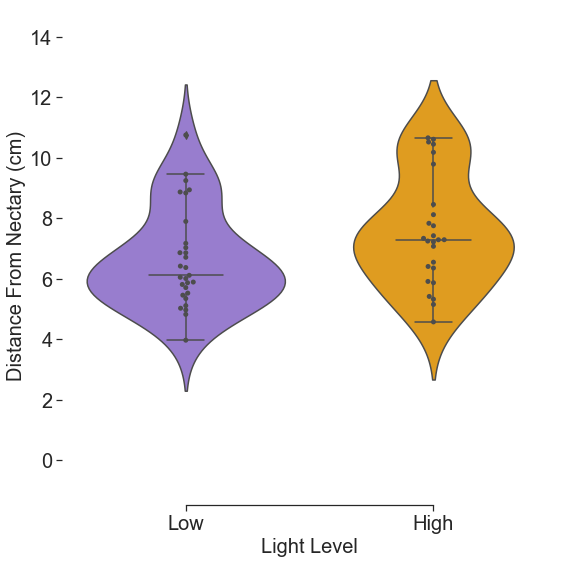

In [146]:
# Plotting the distribution of medians comparing light levels only considering the first trial
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(8,8))
data_median_first = median_radial_length_low_first + median_radial_length_high_first
data_median_first
light = ["Low"]*len(median_radial_length_low_first)
light.extend(["High"]*len(median_radial_length_high_first))
vdf_f = (pd.DataFrame({'Radial_distance_inradii': data_median_first, 'Light_Level': light}))

sns.violinplot(x = 'Light_Level', y= 'Radial_distance_inradii', data = vdf_f, inner = None,
           palette=['mediumpurple','orange'])
sns.boxplot(x='Light_Level', y ='Radial_distance_inradii', data = vdf_f, width = 0.3)
sns.swarmplot(x='Light_Level', y ='Radial_distance_inradii', data = vdf_f,
            size=5, color="0.3", linewidth=0)

plt.ylim(-1.5,15)
ax.xaxis.grid(False)
plt.yticks(size = 20)
plt.xticks([0,1], size = 20)
plt.xlabel('Light Level', size = 20)
plt.ylabel('Distance From Nectary (cm)', size = 20)
sns.despine(trim=True, left=True)
plt.tight_layout()

plt.savefig(out_path + "\\First_Distance_Radius.png")

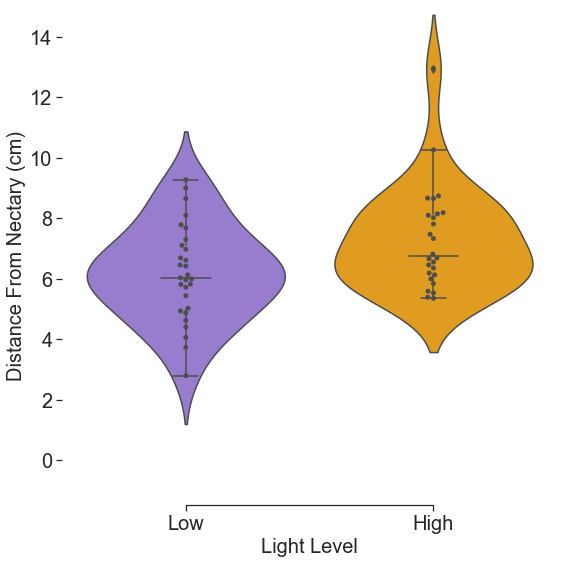

In [147]:
# Plotting the distribution of medians comparing light levels only considering the last trial
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(8, 8))

data_median_last = median_radial_length_low_last + median_radial_length_high_last
light_l = ["Low"]*len(median_radial_length_low_last)
light_l.extend(["High"]*len(median_radial_length_high_last))
vdf_l = (pd.DataFrame({'Radial distance (in cm)': data_median_last, 'Light Level': light_l}))

sns.violinplot(x='Light Level', y ='Radial distance (in cm)', data = vdf_l, inner=None,
           palette=['mediumpurple','orange'])
sns.boxplot(x='Light Level', y ='Radial distance (in cm)', data = vdf_l, width = 0.2)
sns.swarmplot(x='Light Level', y ='Radial distance (in cm)', data = vdf_l,
            size=5, color="0.3", linewidth=0)


ax.xaxis.grid(False)
plt.ylim(-1.5,15)
plt.yticks(size = 20)
plt.xticks([0,1], size = 20)
plt.xlabel('Light Level', size = 20)
plt.ylabel('Distance From Nectary (cm)', size = 20)
sns.despine(trim=True, left=True)
sns.despine(trim=True, left=True)
plt.tight_layout()

plt.savefig(out_path + "\\Last_Distance_Radius.png")

In [150]:
n_bins = 50

(Ks_2sampResult(statistic=0.3779840848806366, pvalue=0.027907667845877282),
 MannwhitneyuResult(statistic=255.0, pvalue=0.02026677301829473))

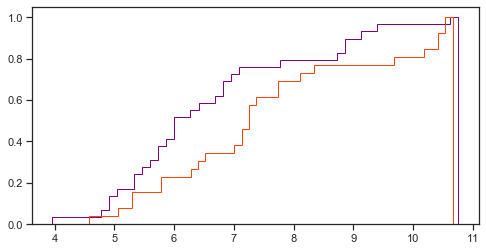

In [154]:
#KS test looks at the largest gap between both cumulative distributions
fig, ax = plt.subplots(figsize=(8, 4))
n, bins, patches = ax.hist(median_radial_length_low_first, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical', color = 'purple')
n, bins, patches = ax.hist(median_radial_length_high_first, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical', color = 'orangered')
sc.stats.mannwhitneyu(median_radial_length_low_first, median_radial_length_high_first)

(Ks_2sampResult(statistic=0.3209549071618037, pvalue=0.0911316410806493),
 MannwhitneyuResult(statistic=238.0, pvalue=0.009775386750228114))

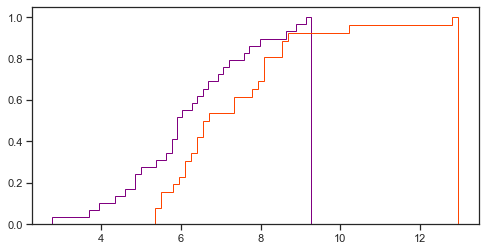

In [155]:
#U-test looks at the probability of a value in blue exceeding a value in orange since it flip flops its not significant
fig, ax = plt.subplots(figsize=(8, 4))
n, bins, patches = ax.hist(median_radial_length_low_last, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical', color = 'purple')
n, bins, patches = ax.hist(median_radial_length_high_last, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical', color = 'orangered')
sc.stats.mannwhitneyu(median_radial_length_low_last, median_radial_length_high_last)

C:\Users\guess\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\guess\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


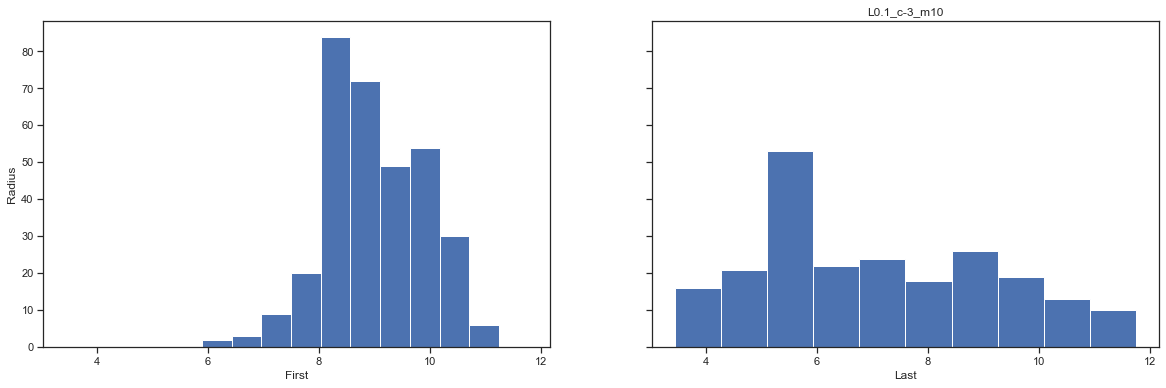

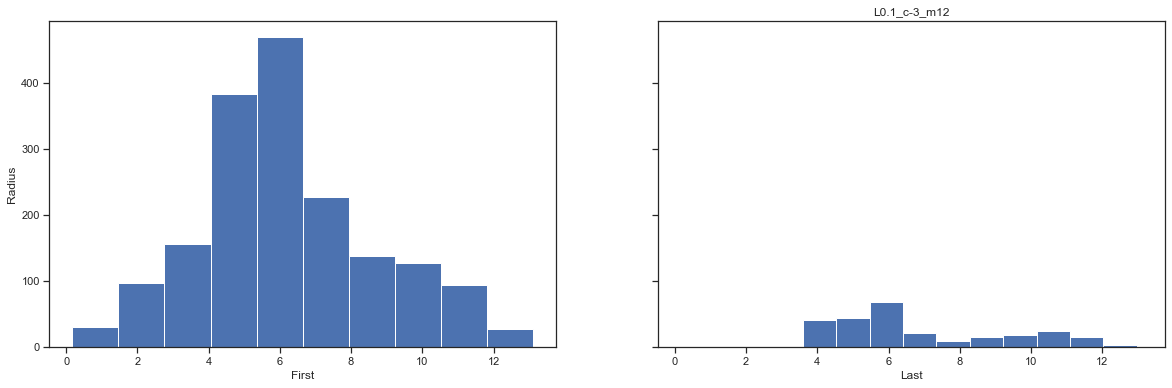

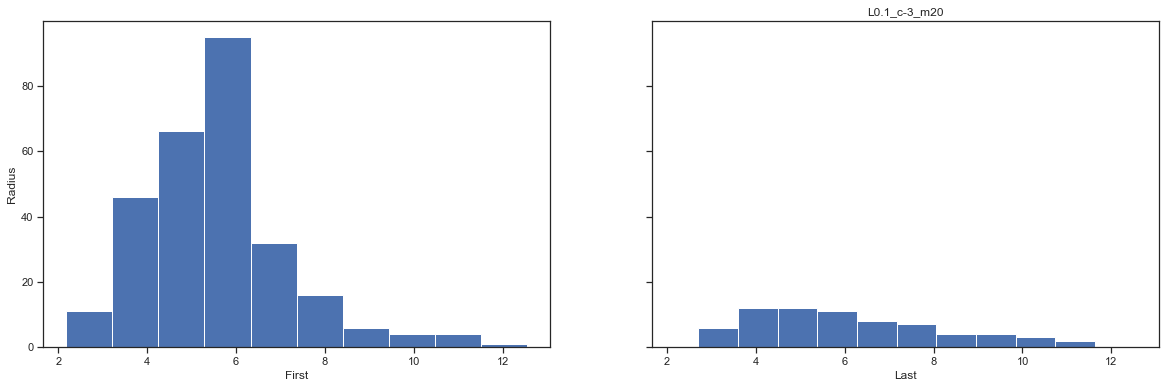

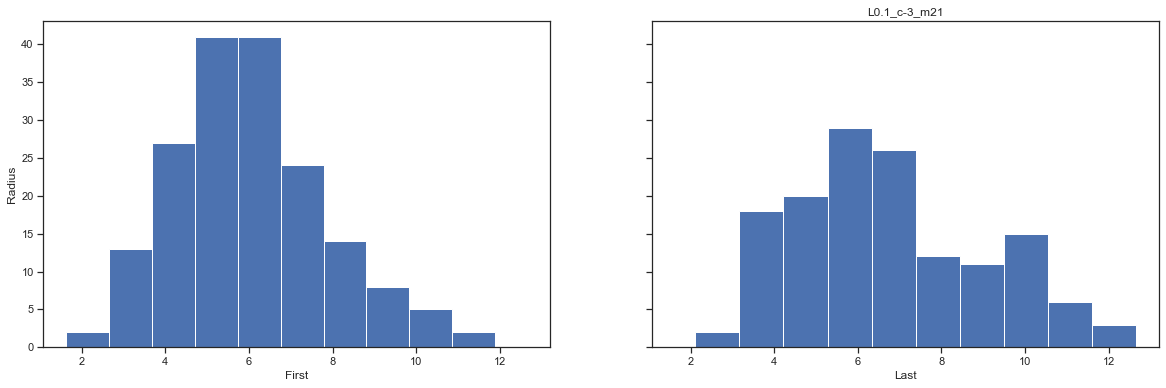

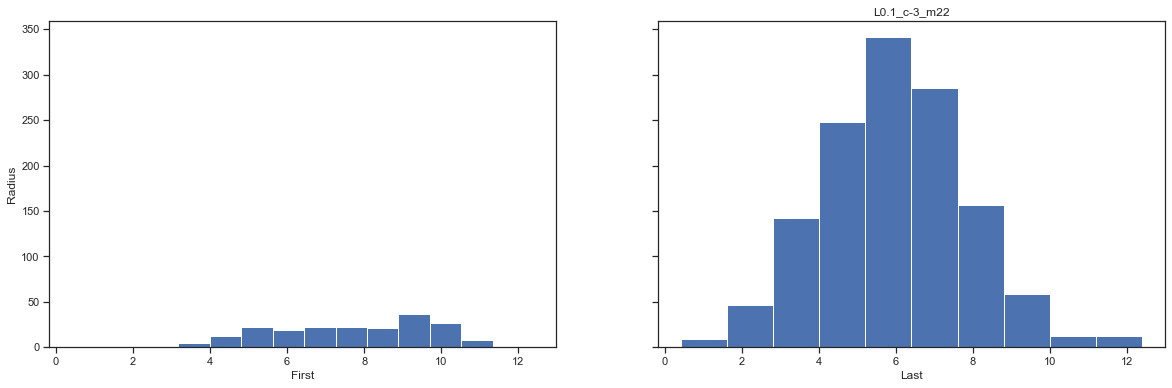

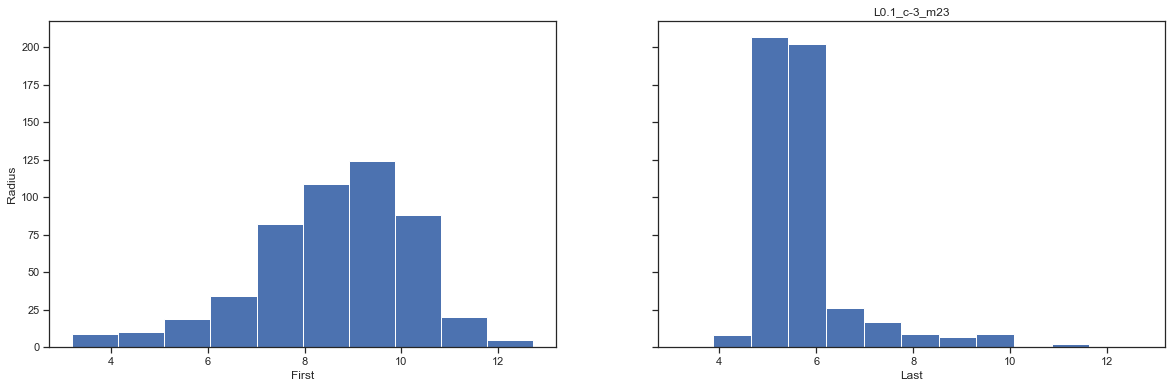

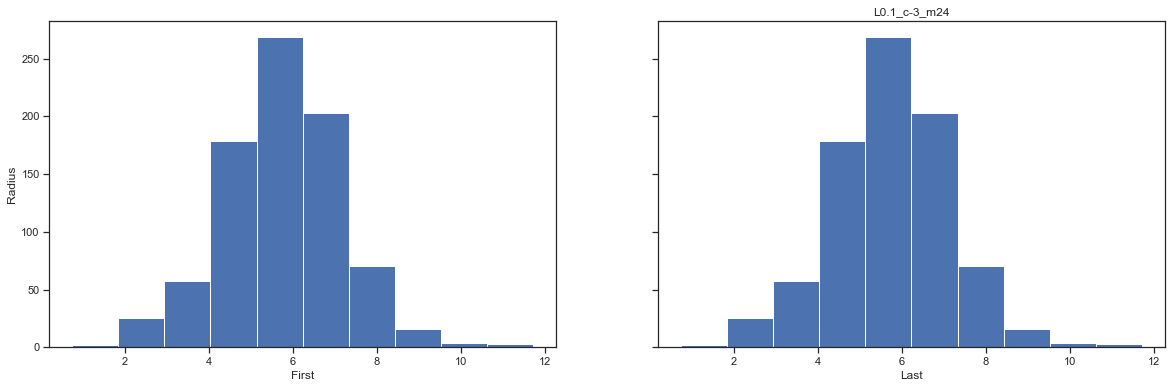

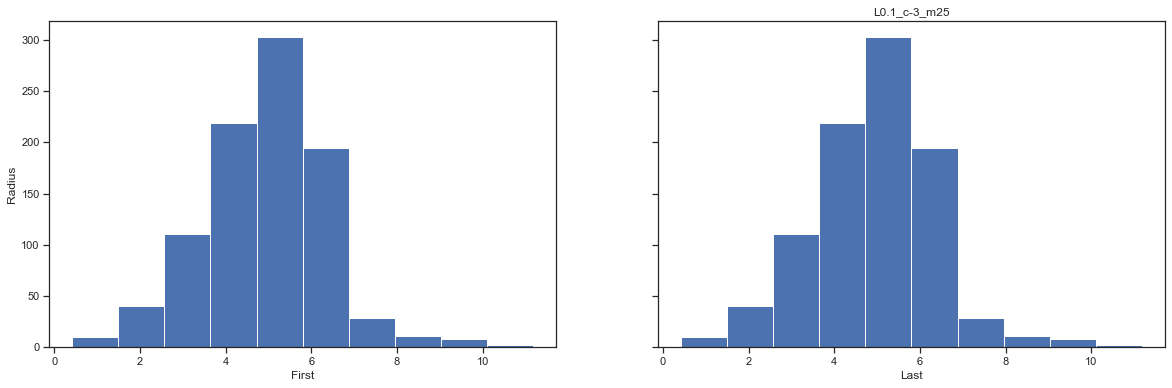

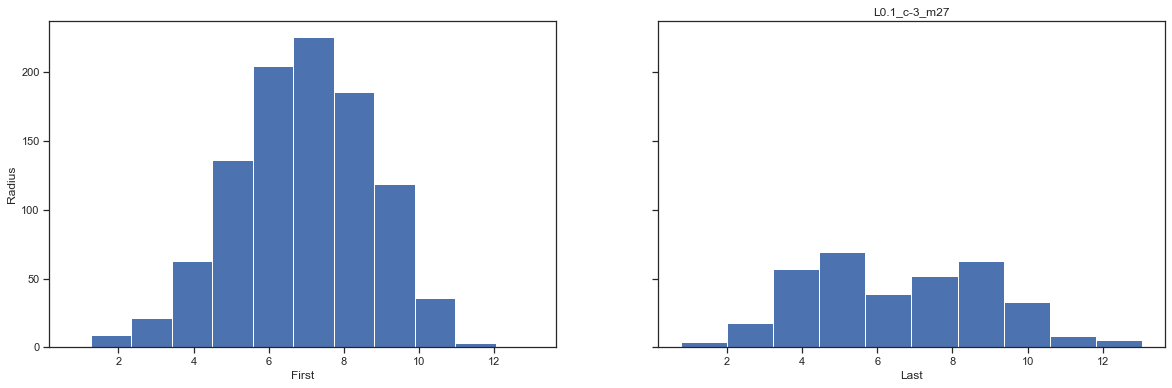

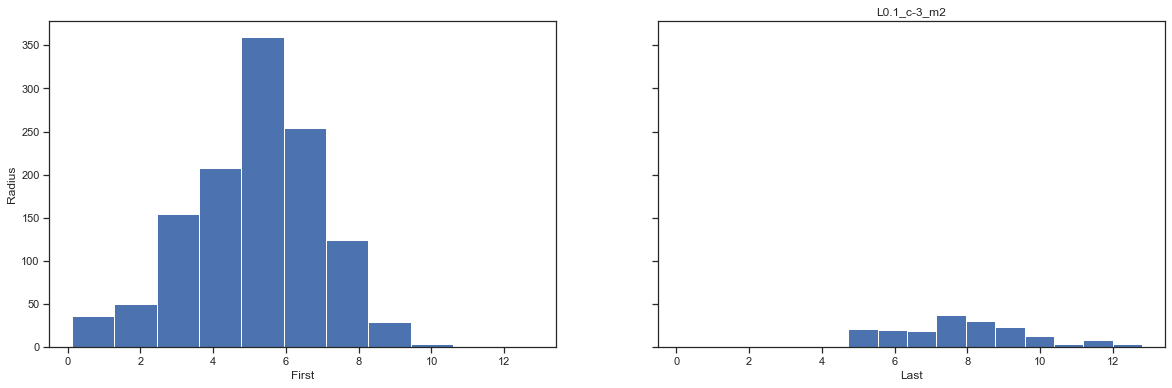

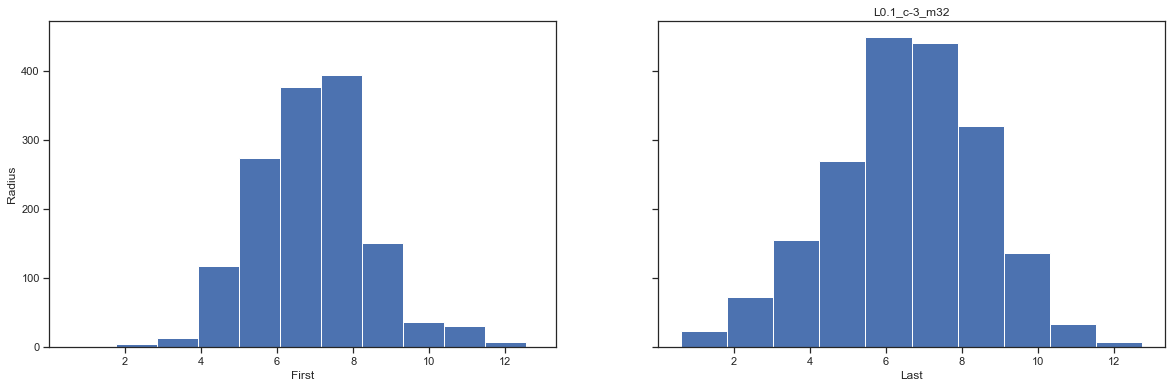

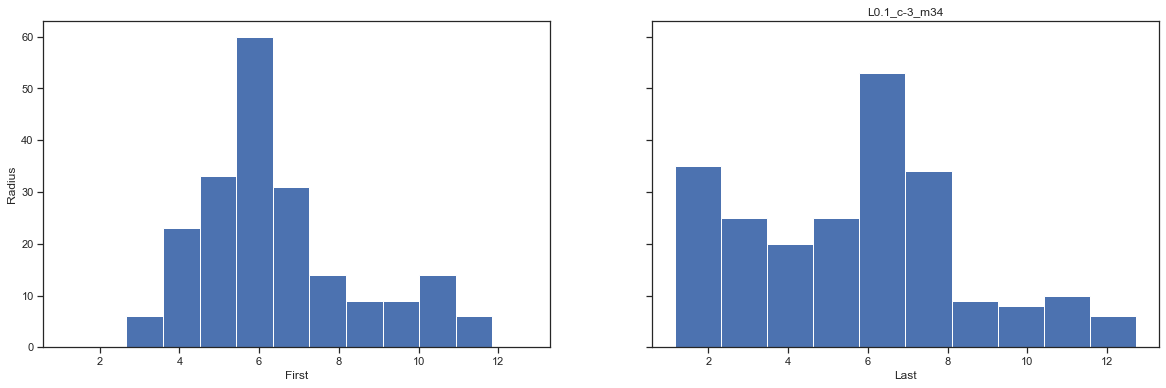

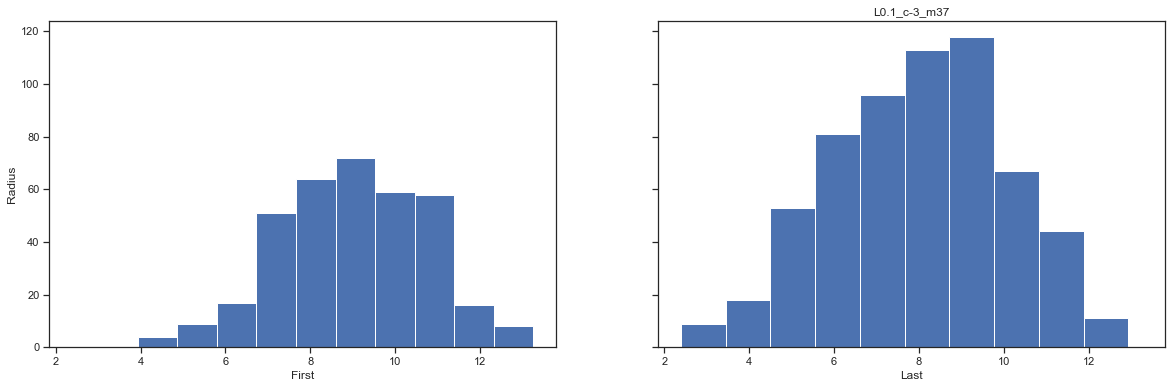

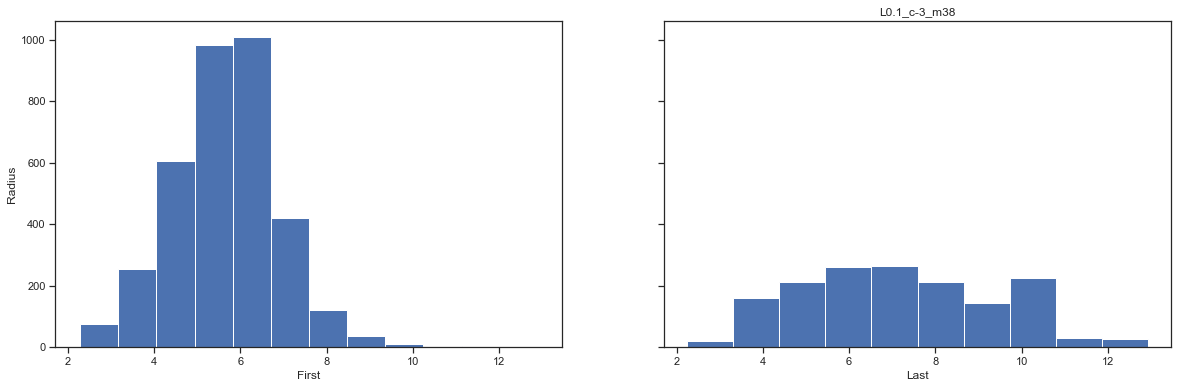

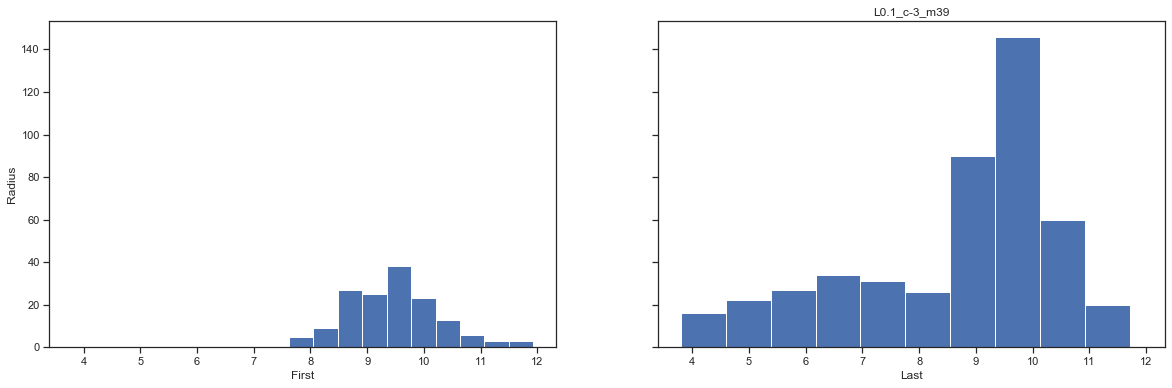

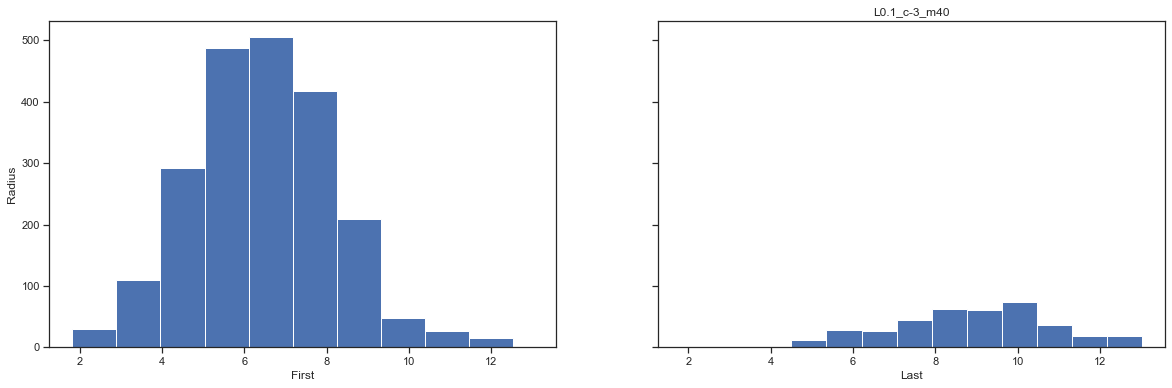

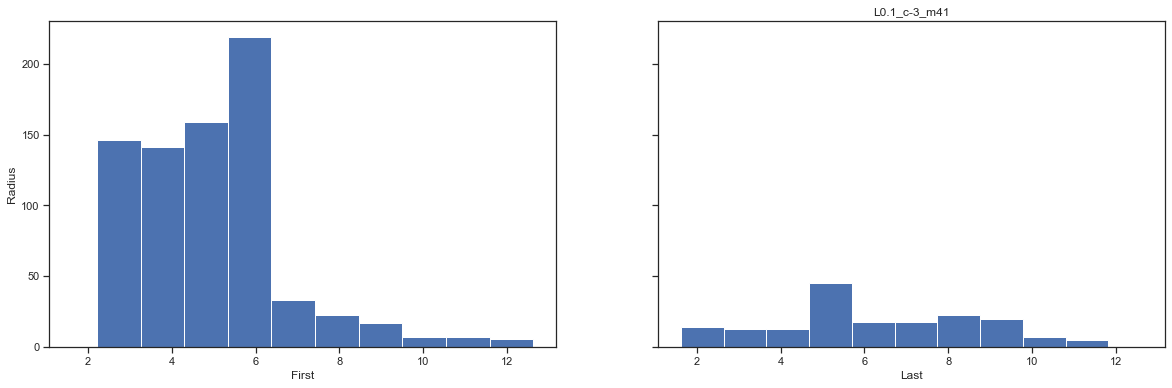

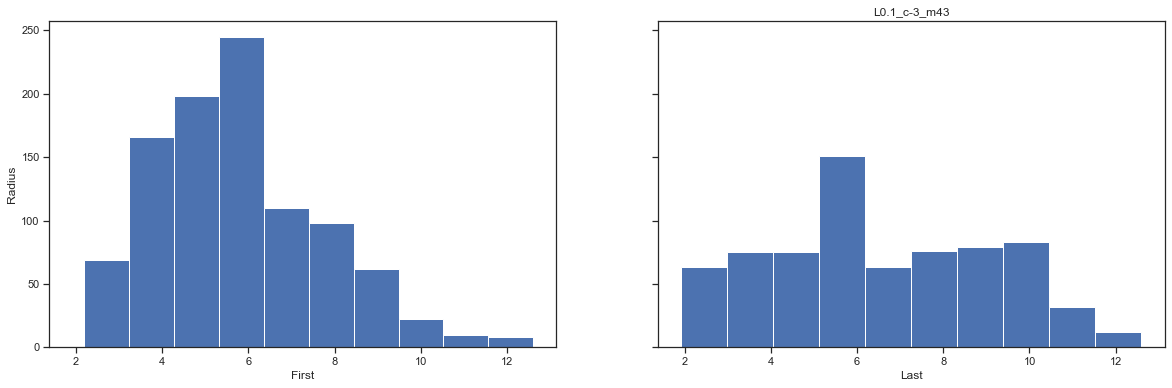

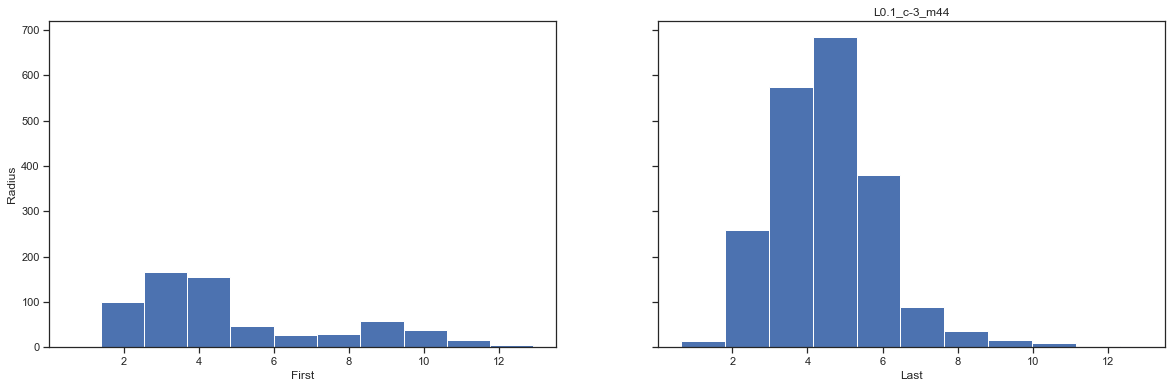

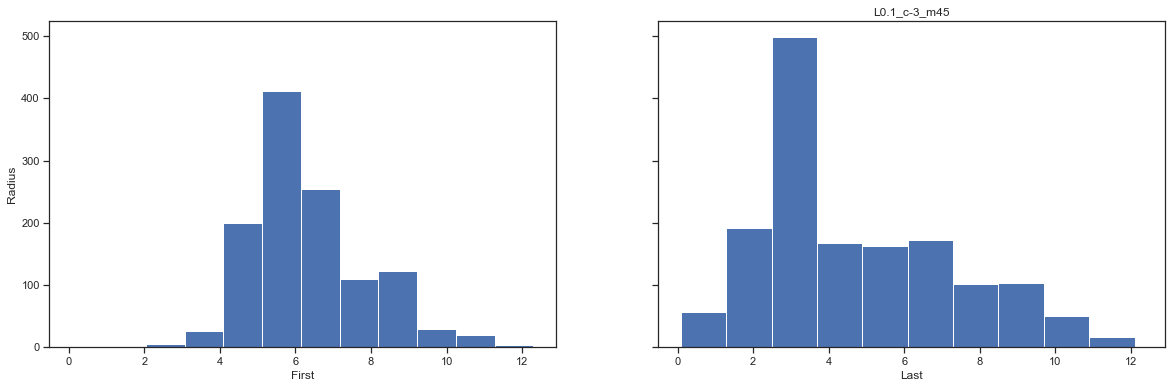

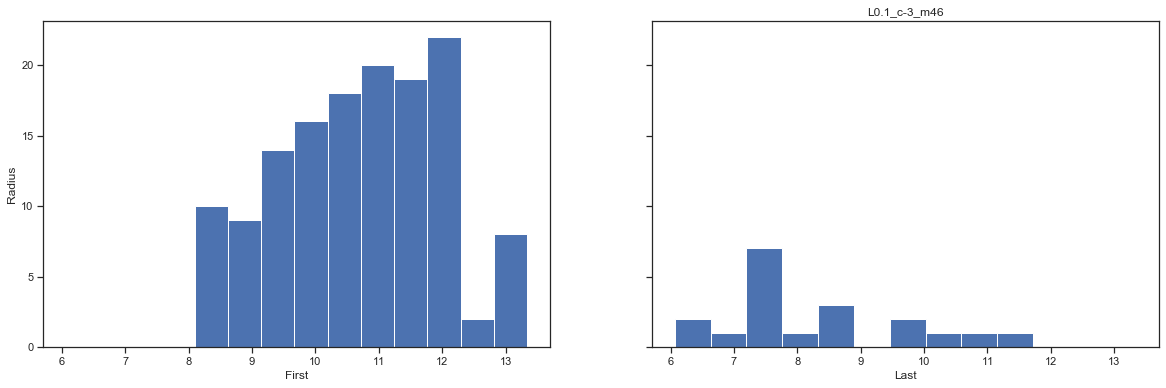

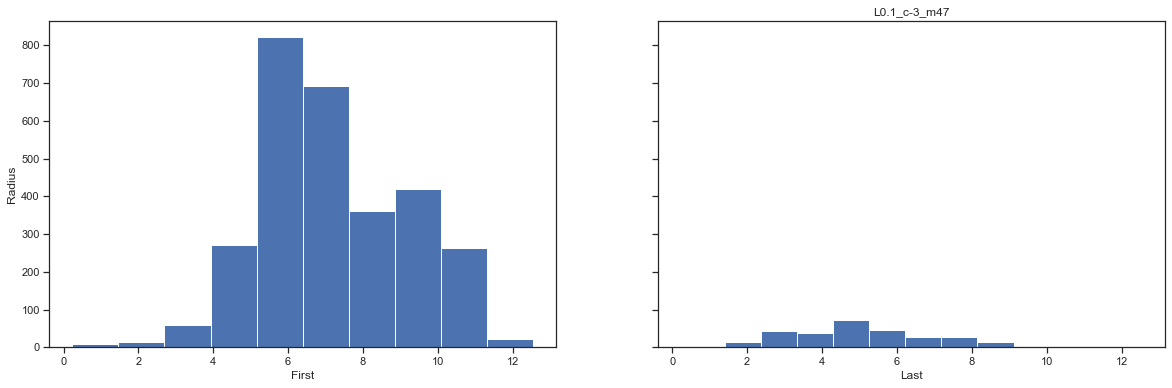

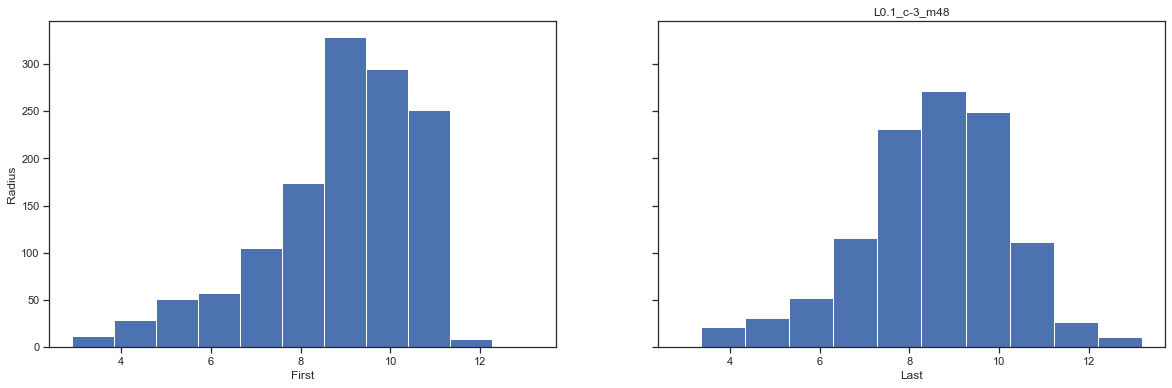

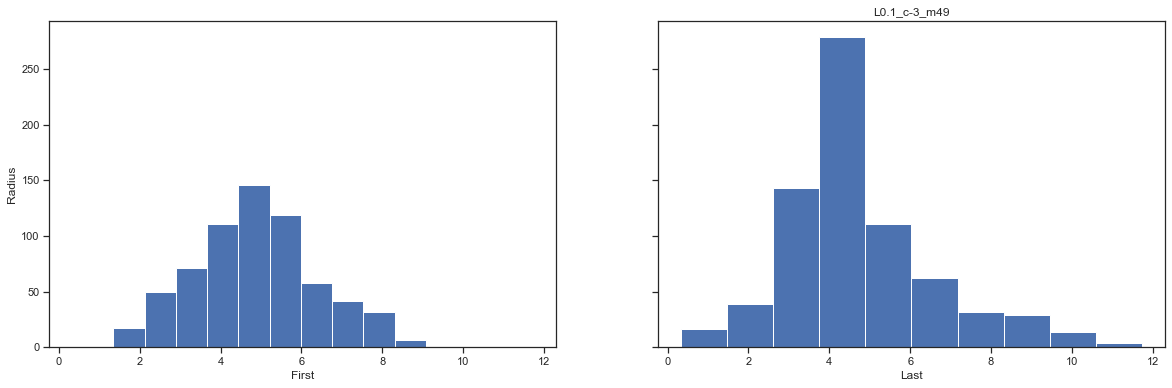

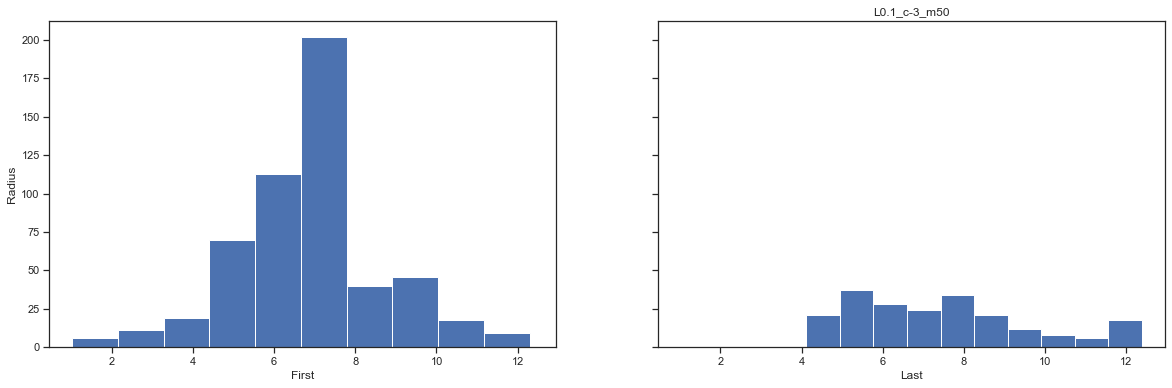

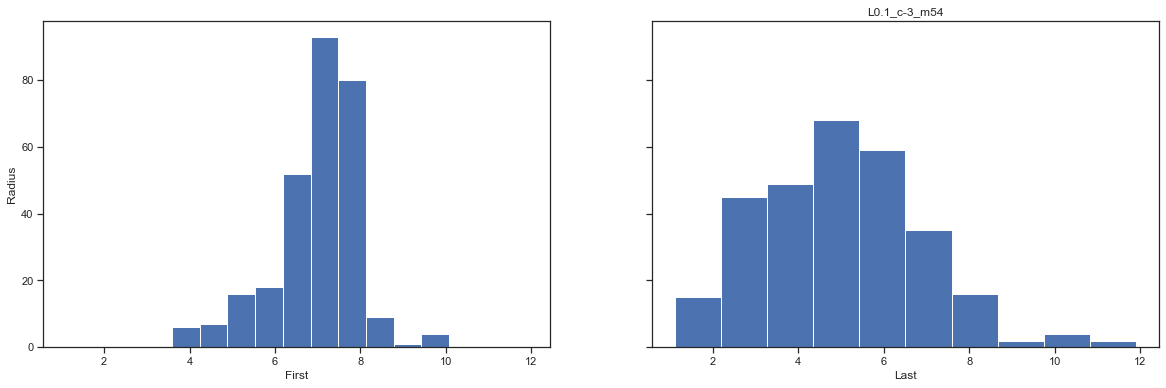

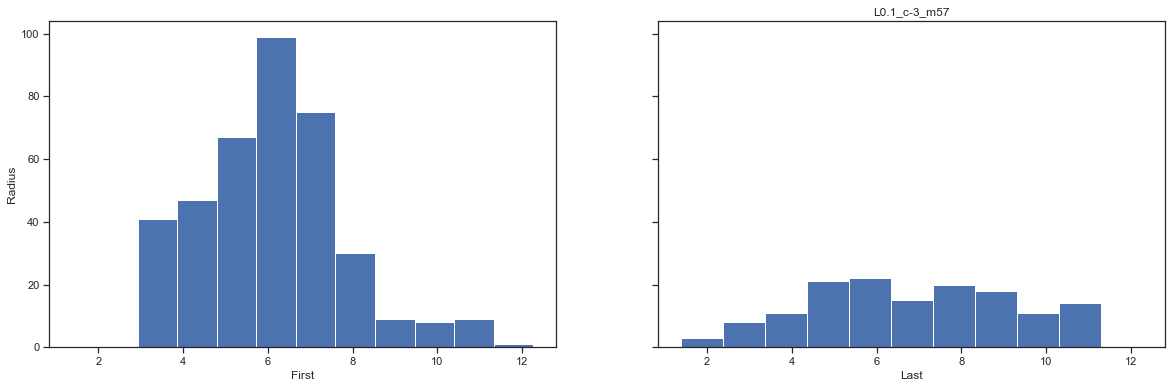

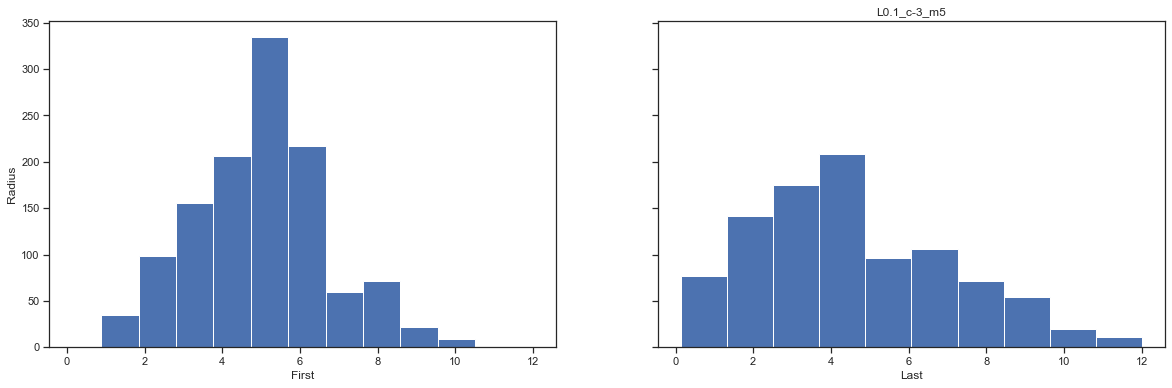

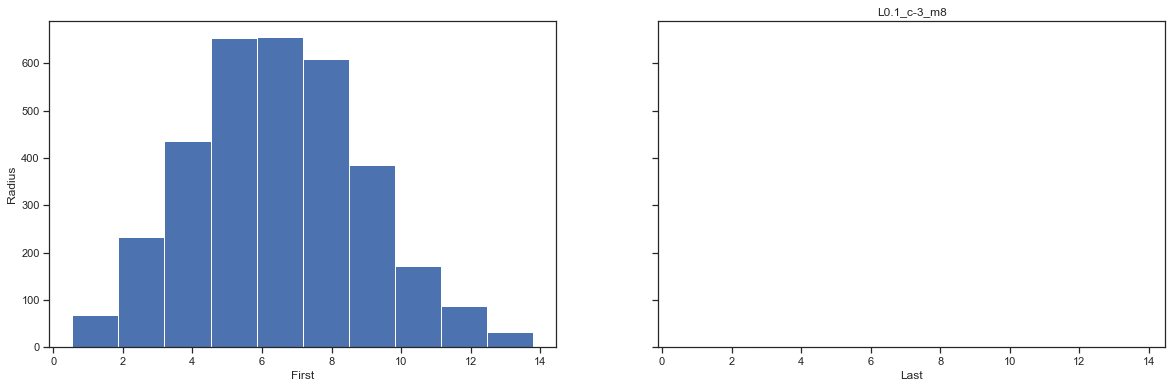

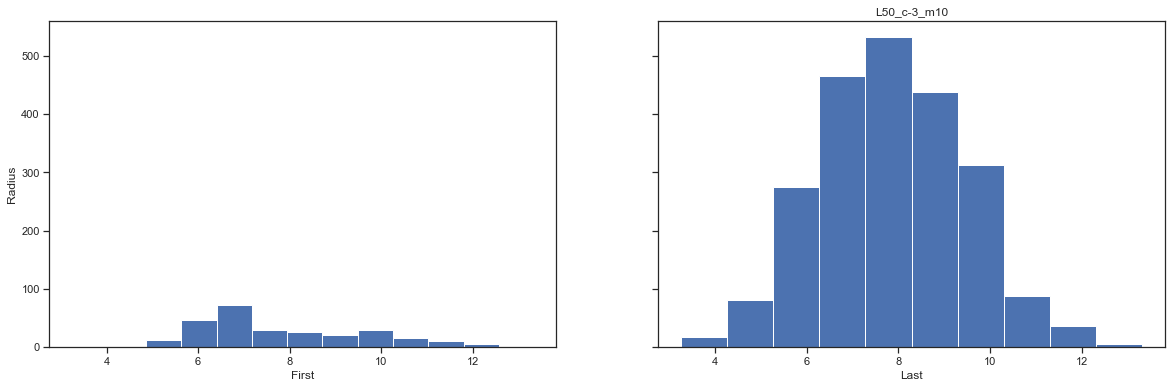

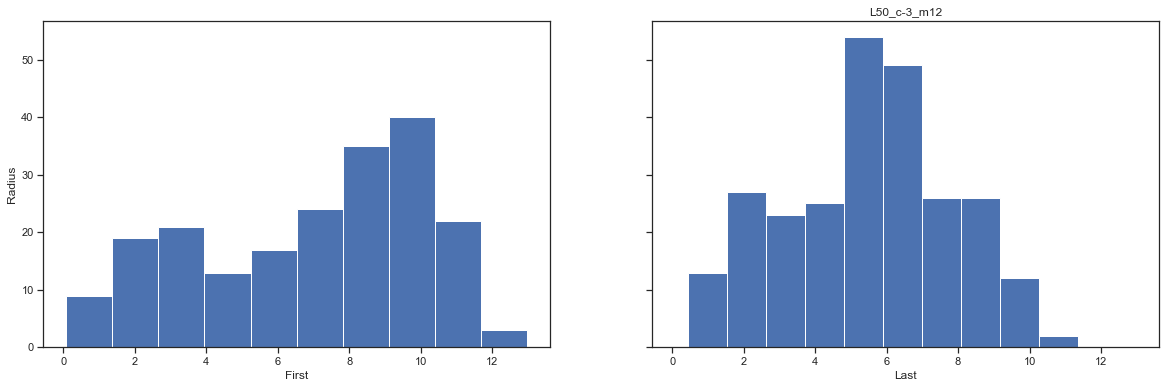

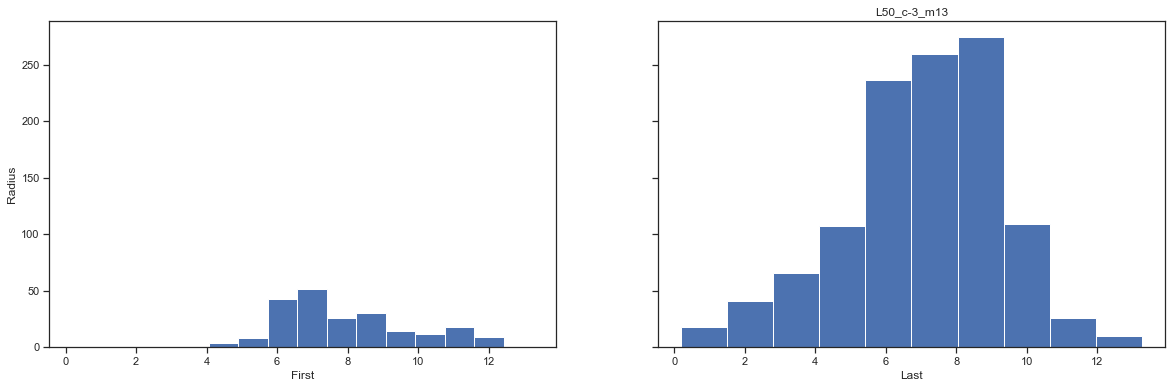

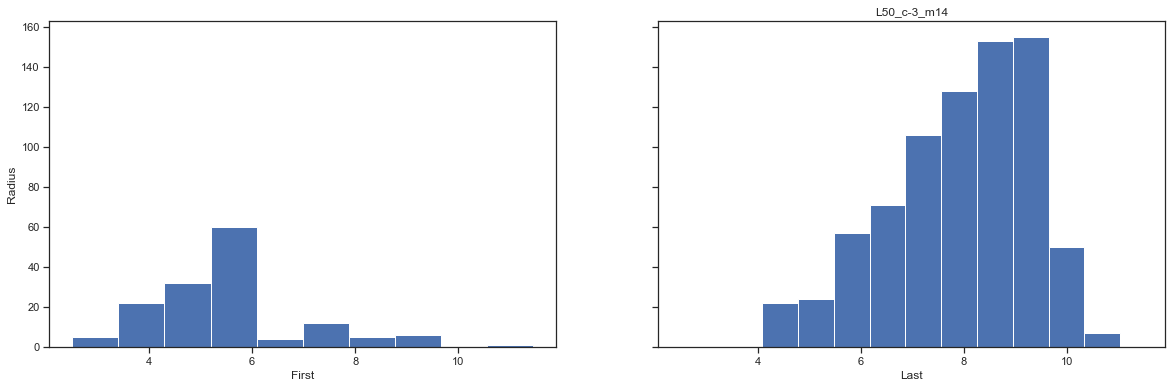

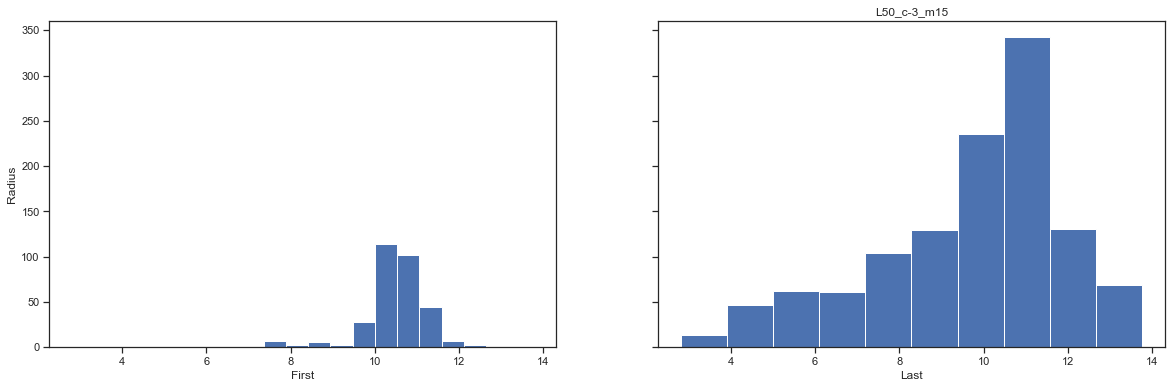

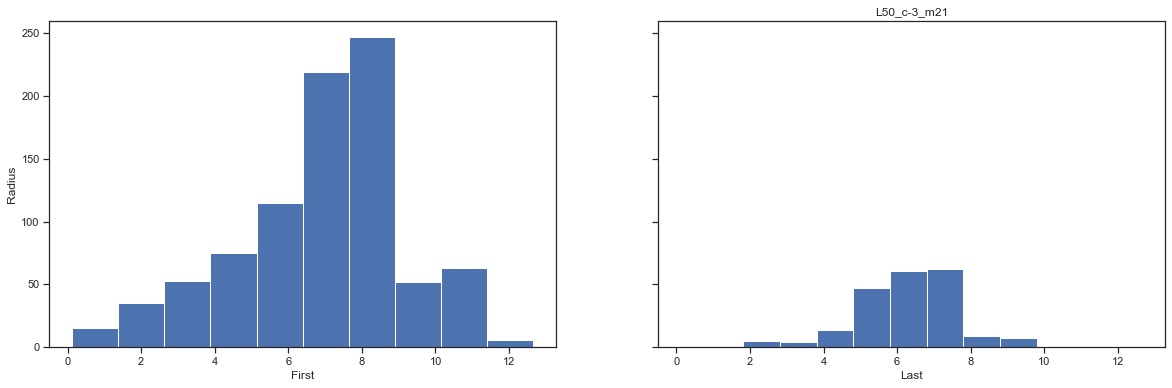

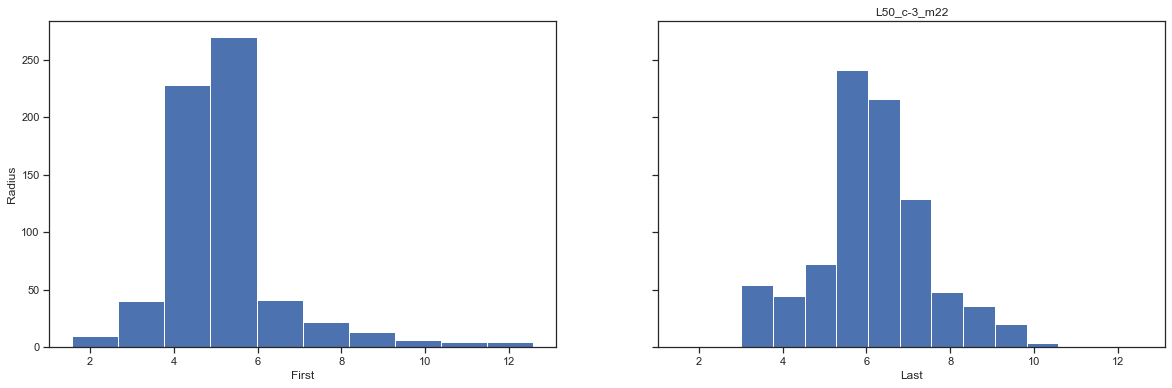

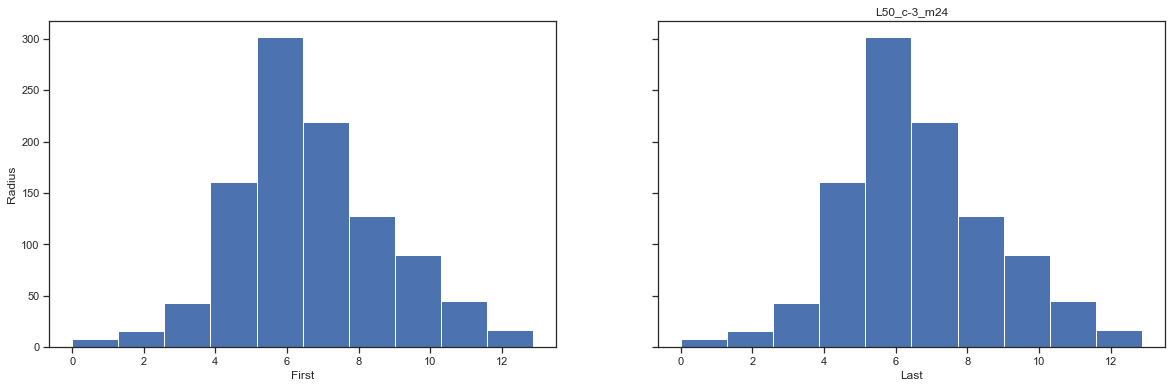

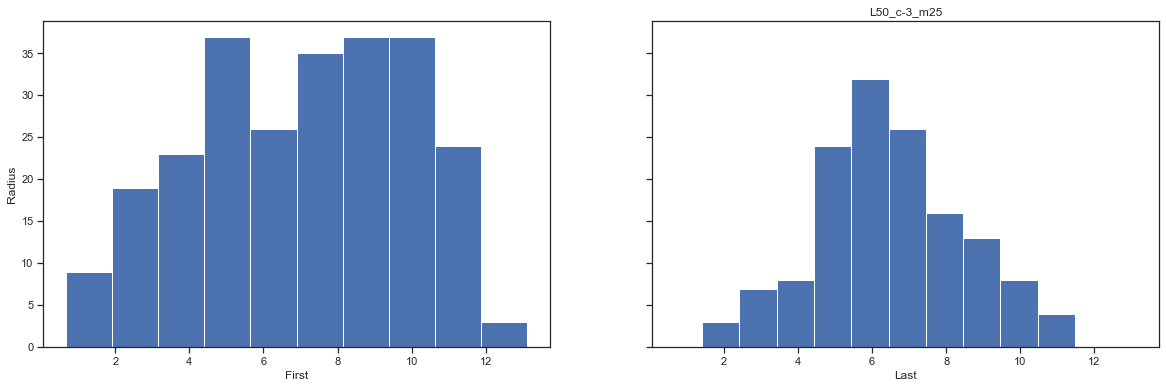

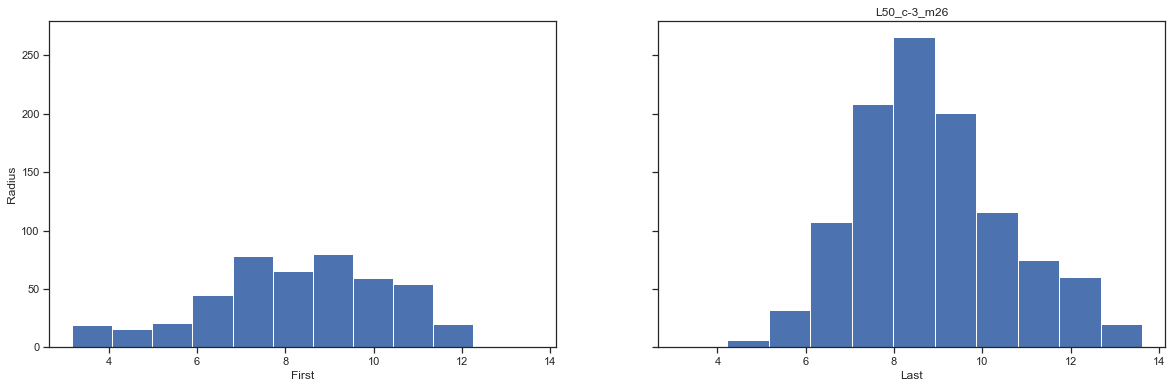

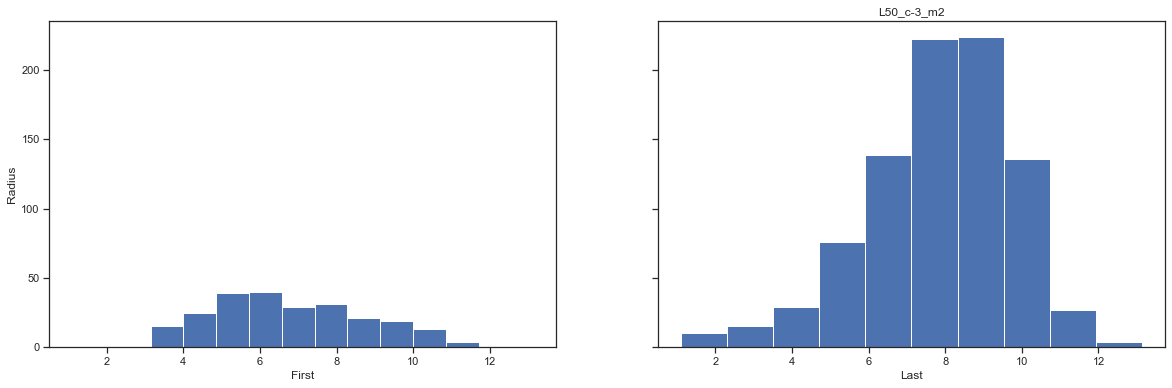

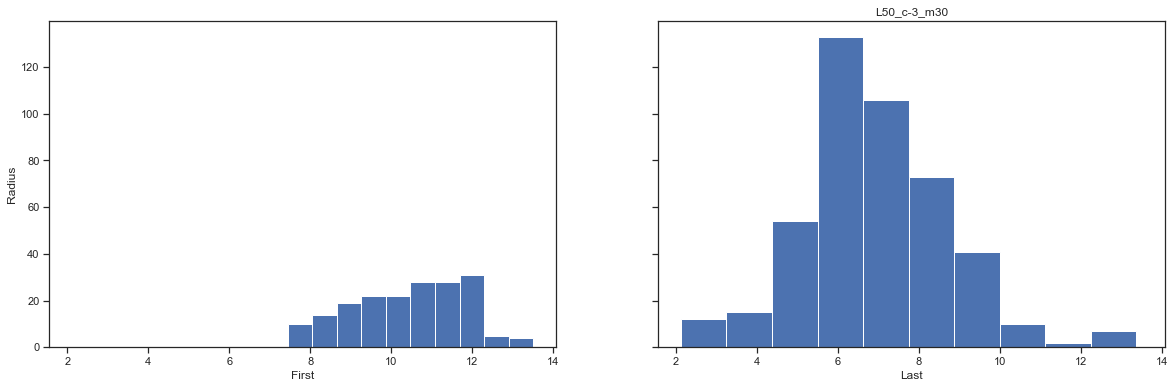

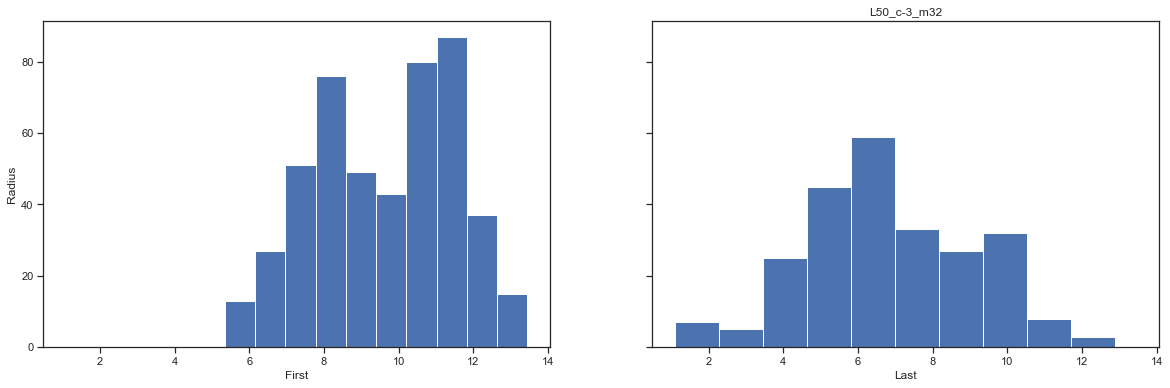

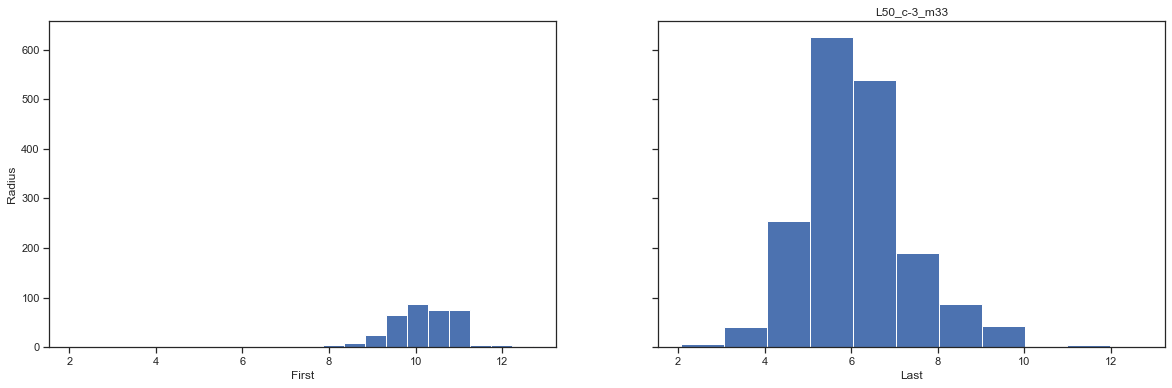

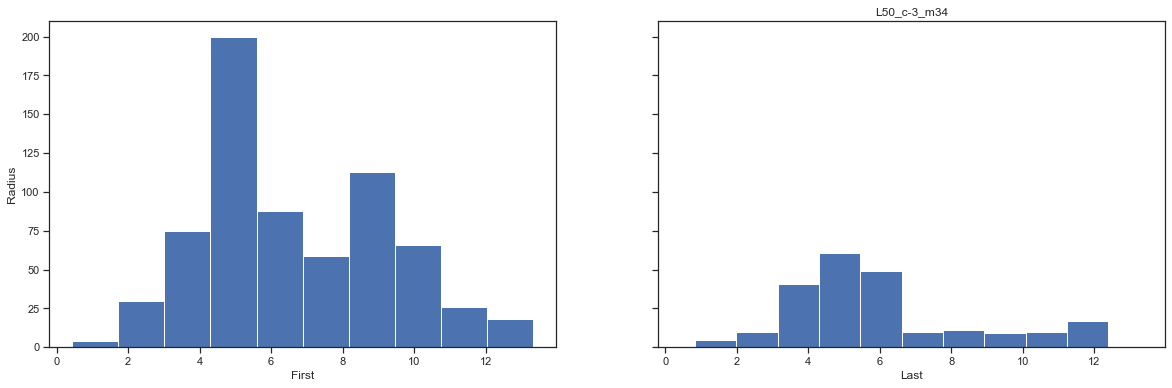

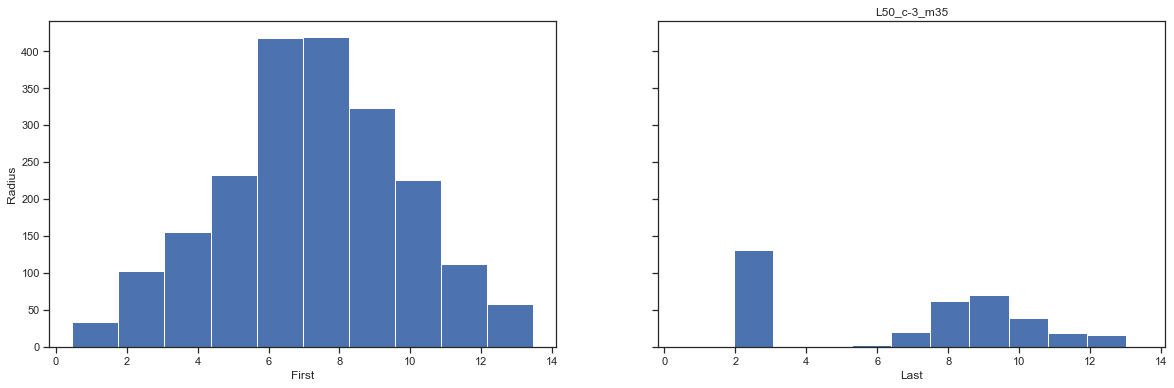

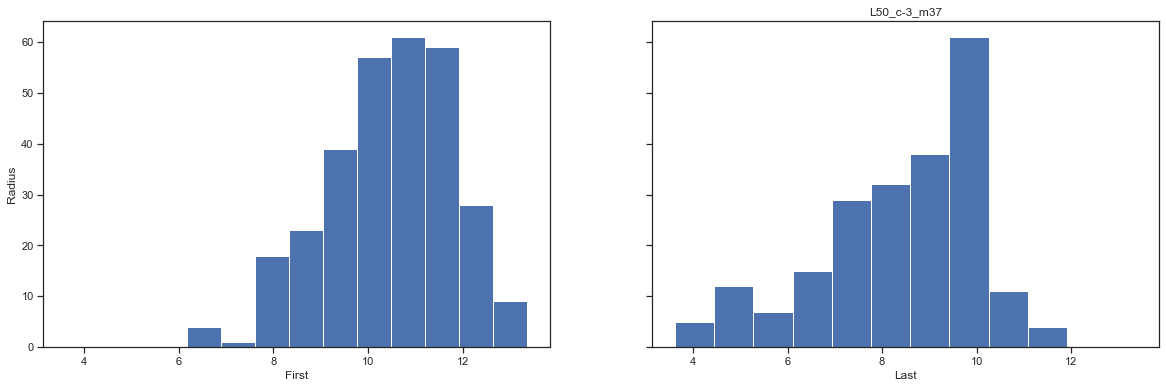

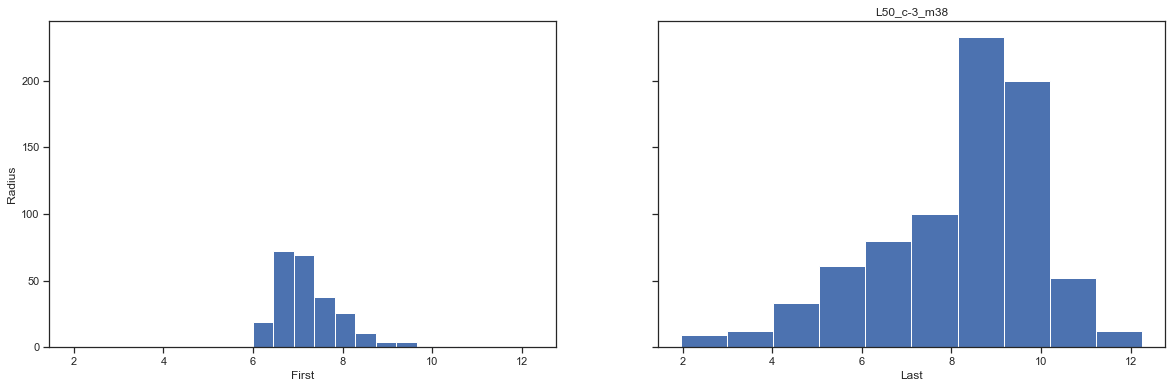

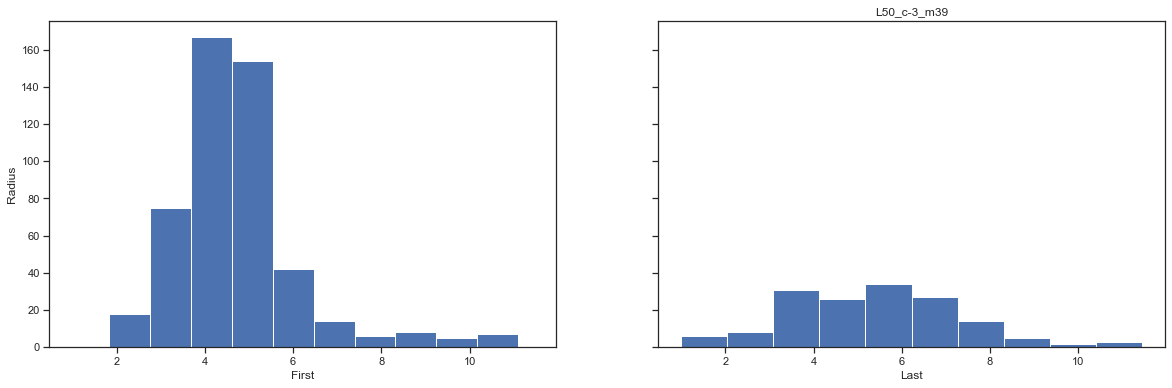

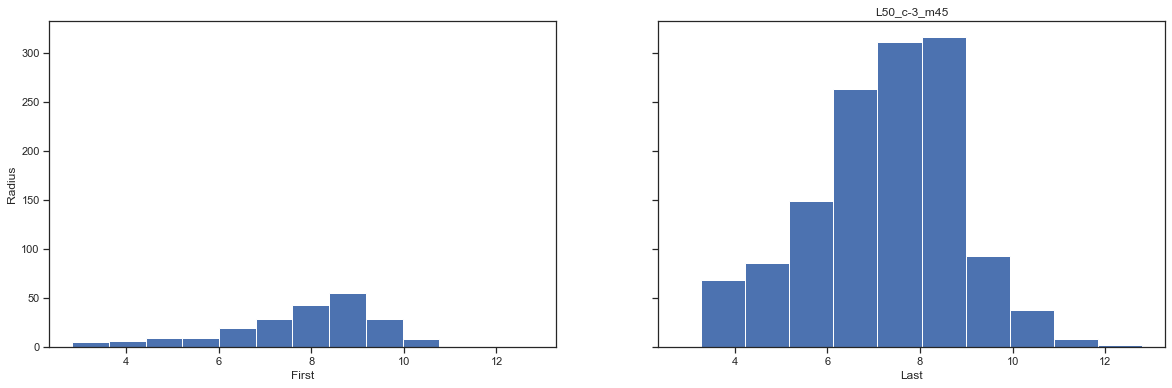

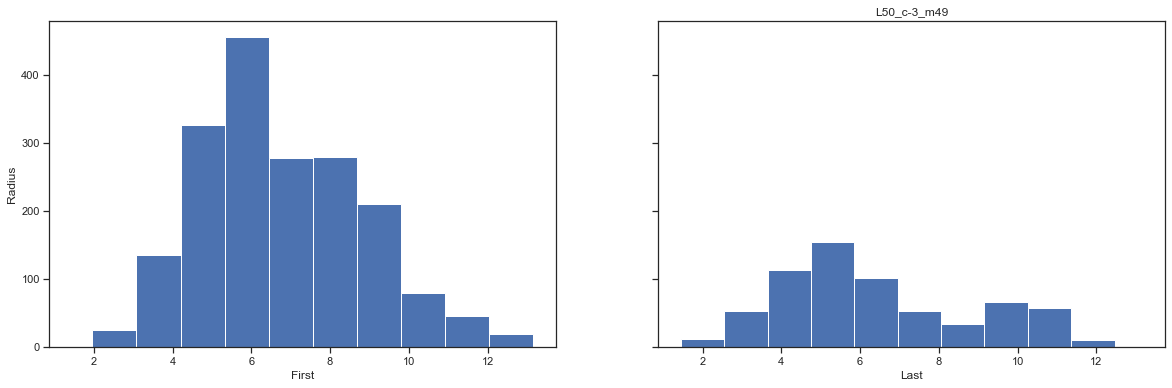

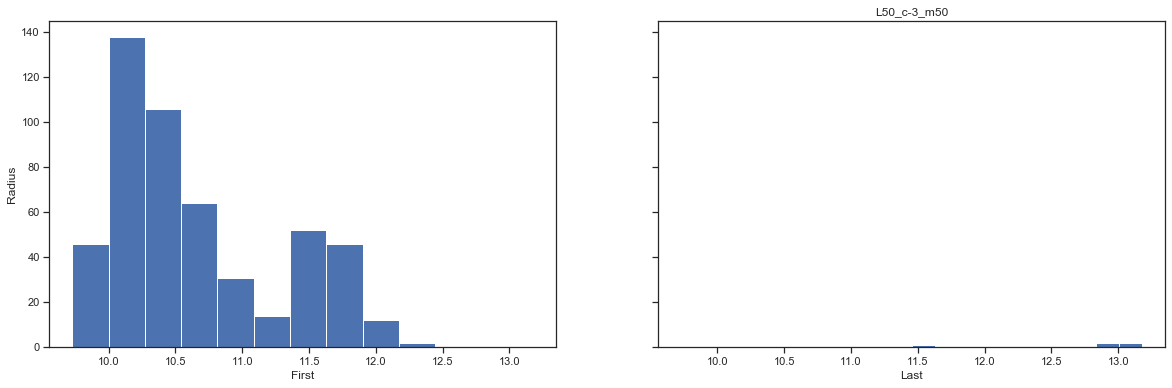

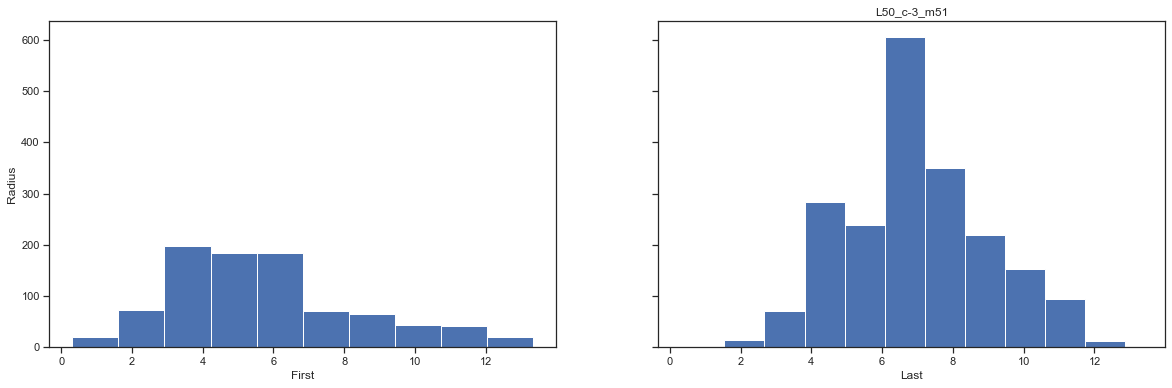

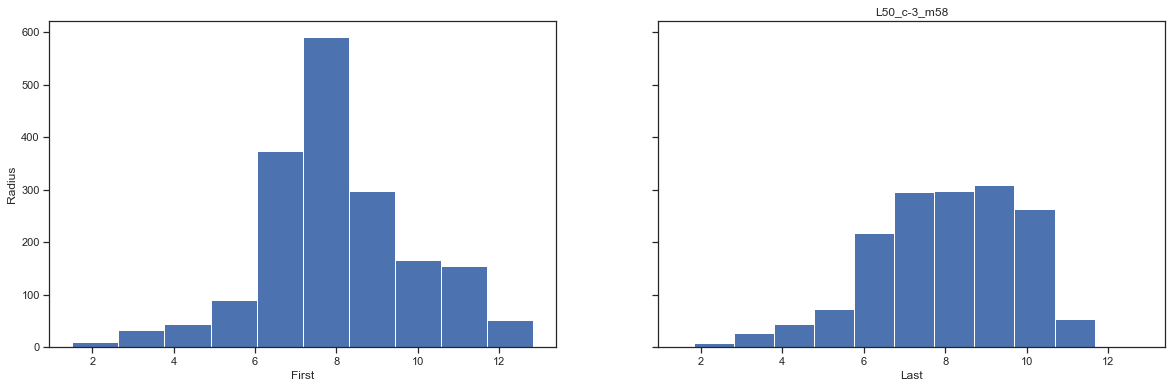

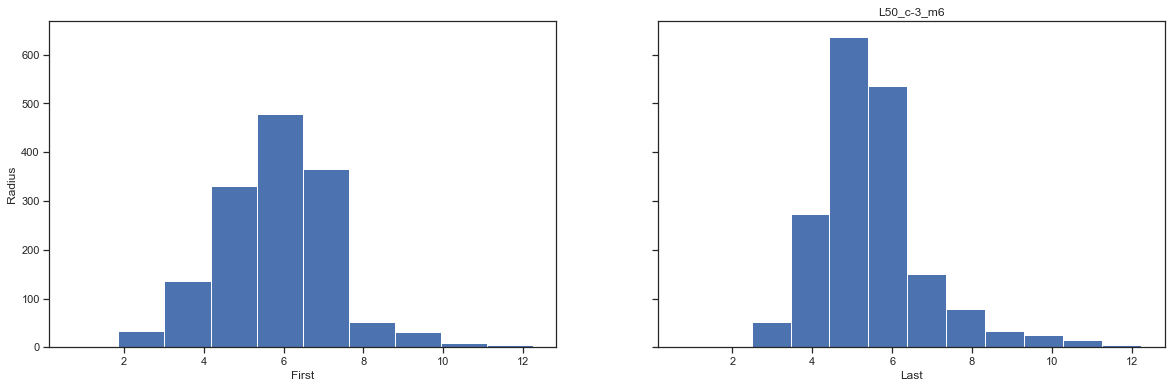

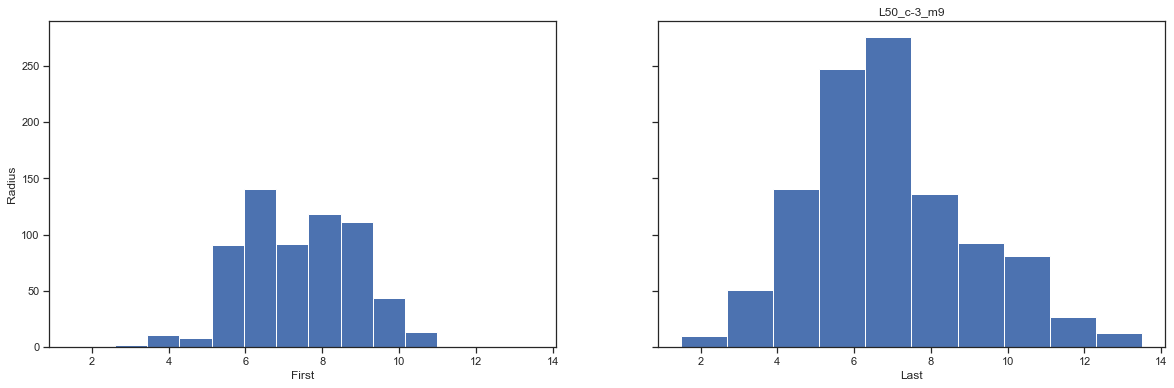

In [156]:
#plot in terms of r
for name in nam_51:
    rad_first_visit = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('first'))].radial_distance
    rad_last_visit = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('last'))].radial_distance
    
#     if len(list(rad_first_visit)) > 0:
    if any(list(~np.isnan(rad_first_visit))) == True & any(list(~np.isnan(rad_last_visit))) == True:
        fig, ax = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (20,6), )
        ax[0].hist(rad_first_visit)
        ax[0].set_ylabel("Radius")
        ax[0].set_xlabel("First")
        ax[1].hist(rad_last_visit)
        ax[1].set_title(name)
        ax[1].set_xlabel("Last")
        plt.savefig(out_path + "\\RadialHistograms\\" + name + ".png")
    else:
        print(name)

C:\Users\guess\Anaconda3\lib\site-packages\matplotlib\projections\polar.py:55: RuntimeWarning: invalid value encountered in greater_equal
  r = np.where(r >= 0, r, np.nan)
C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


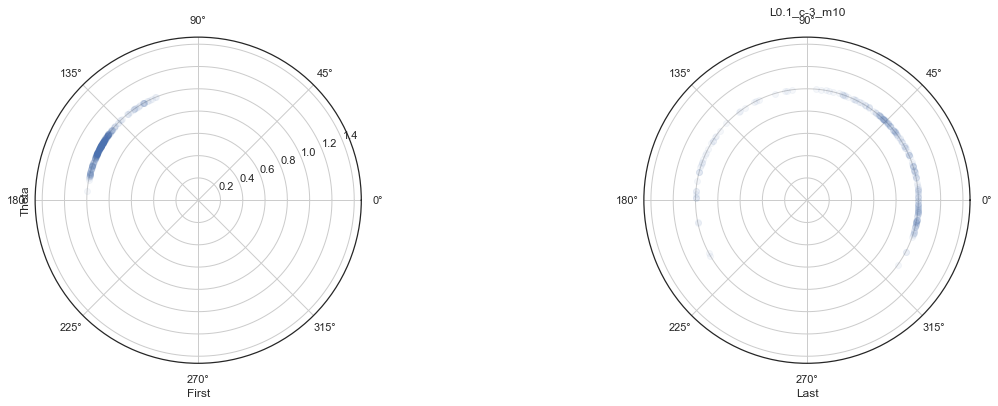

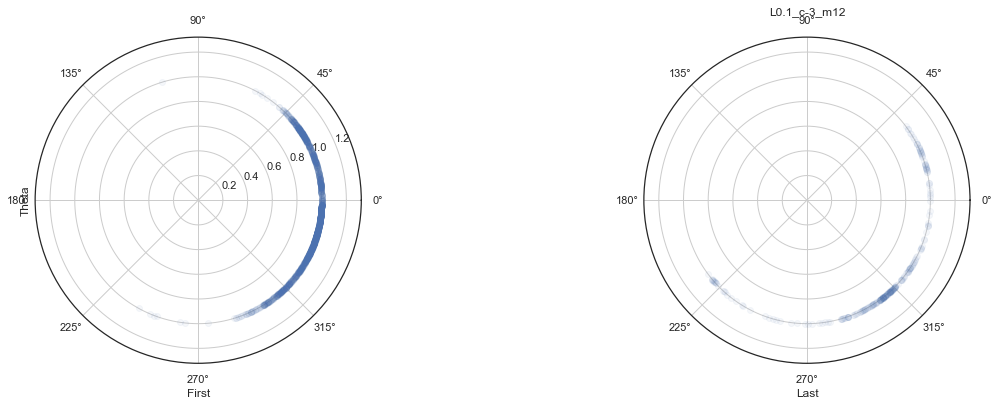

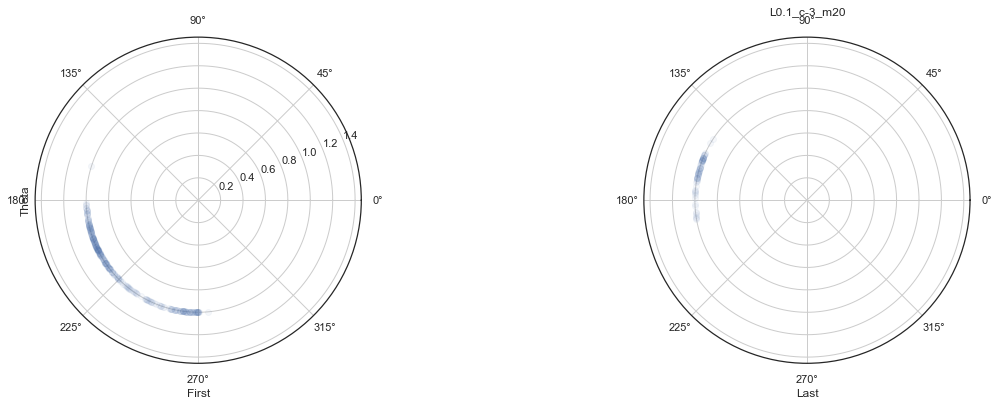

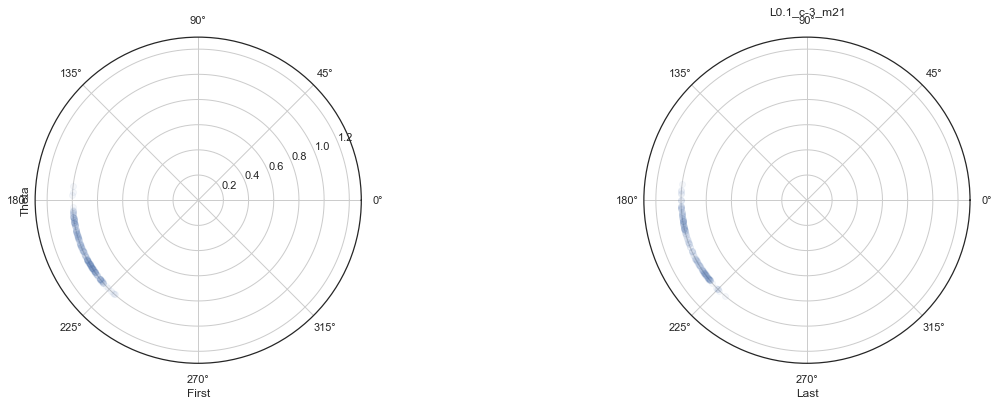

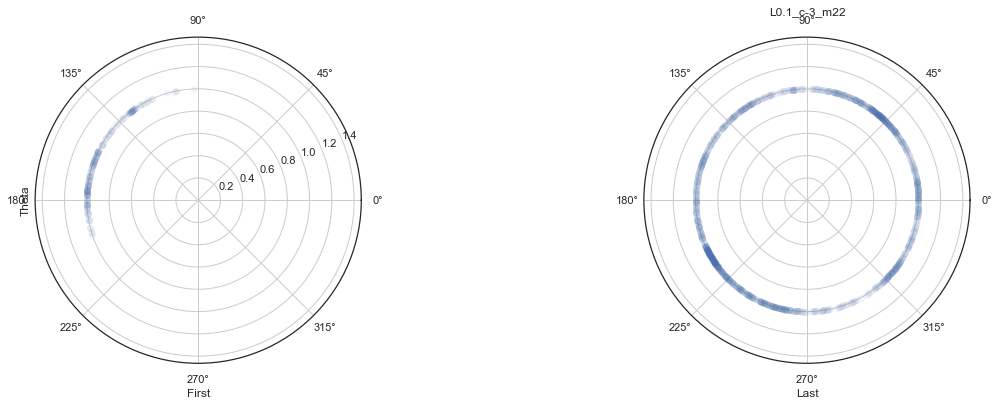

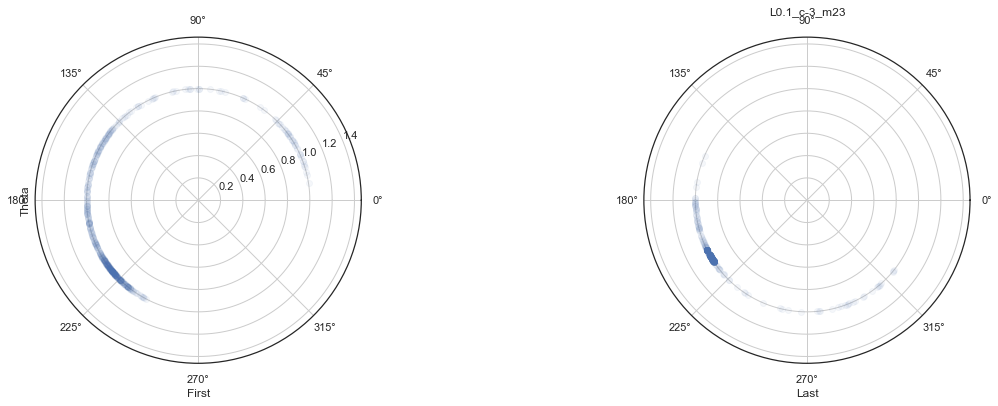

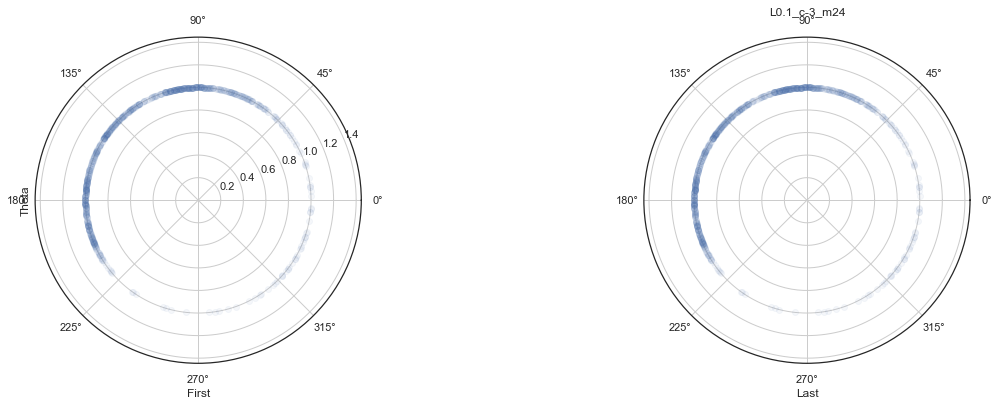

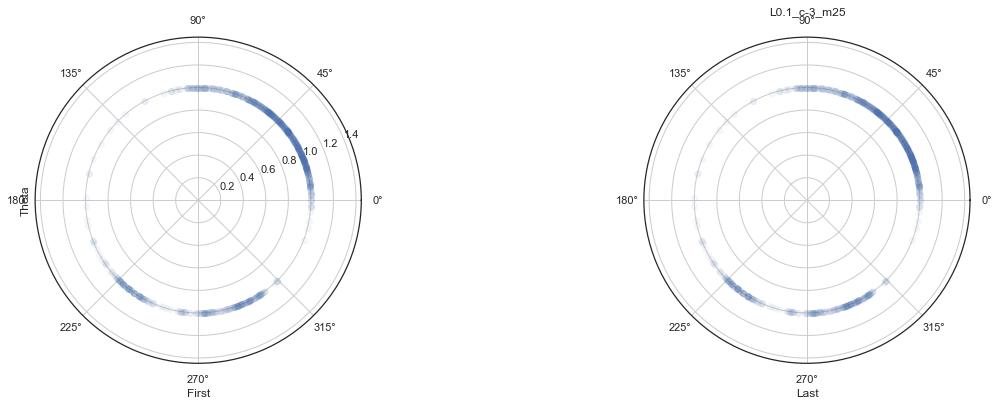

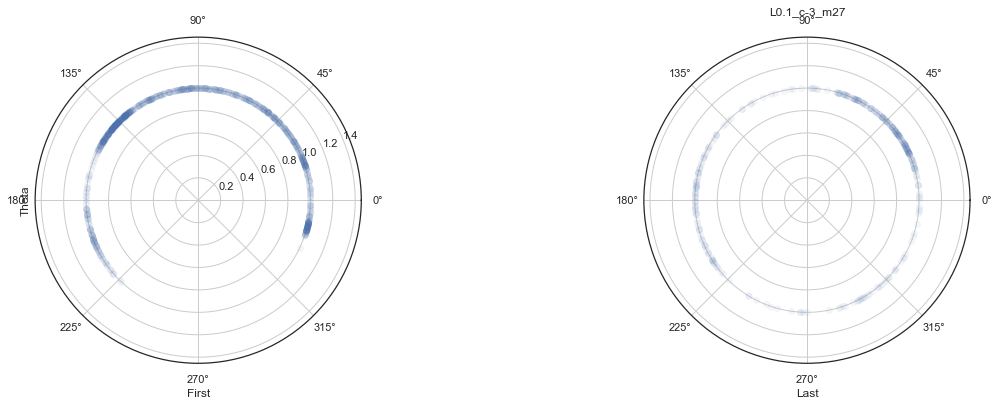

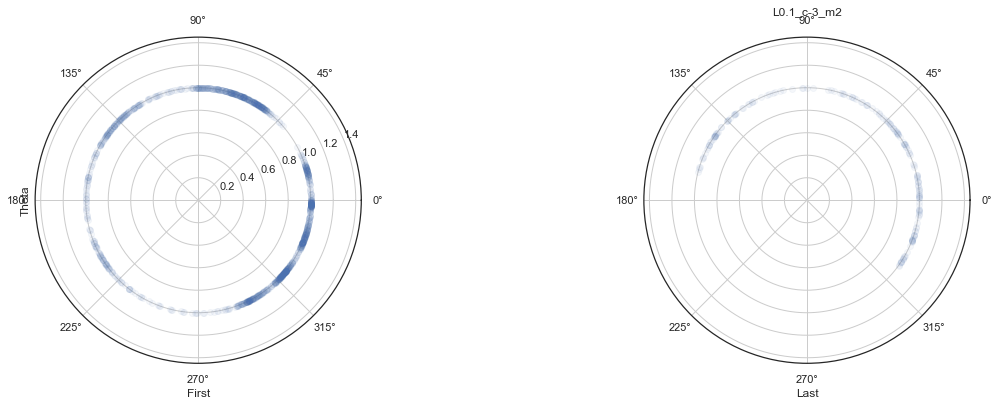

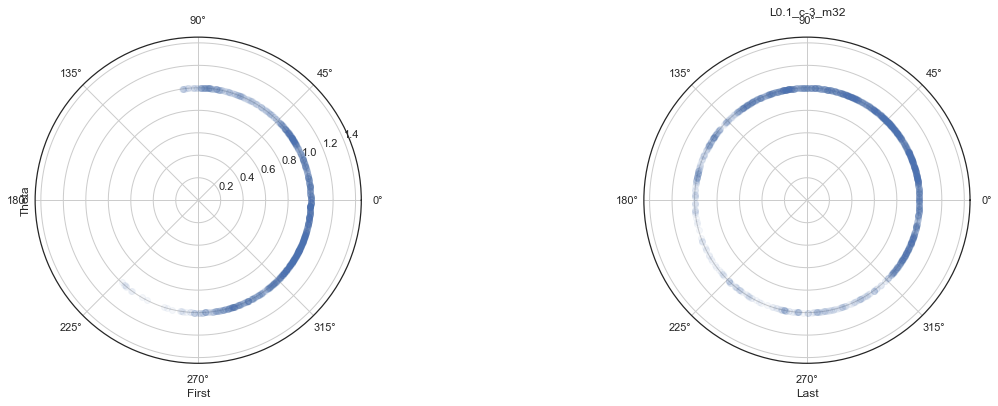

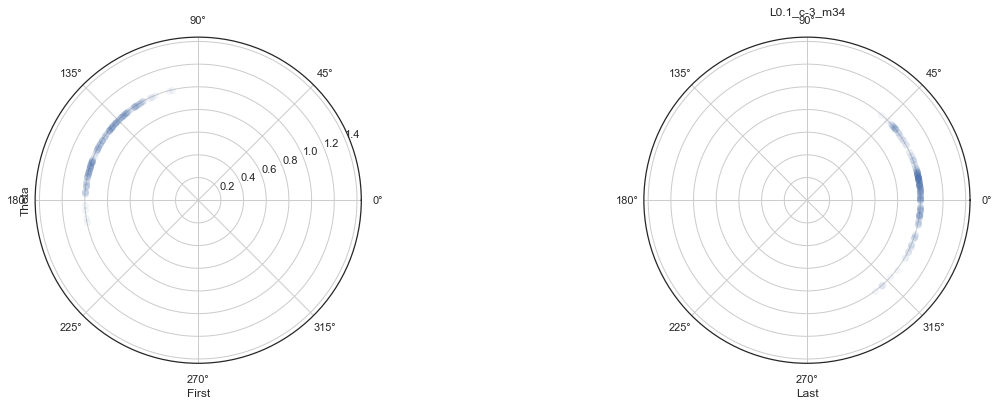

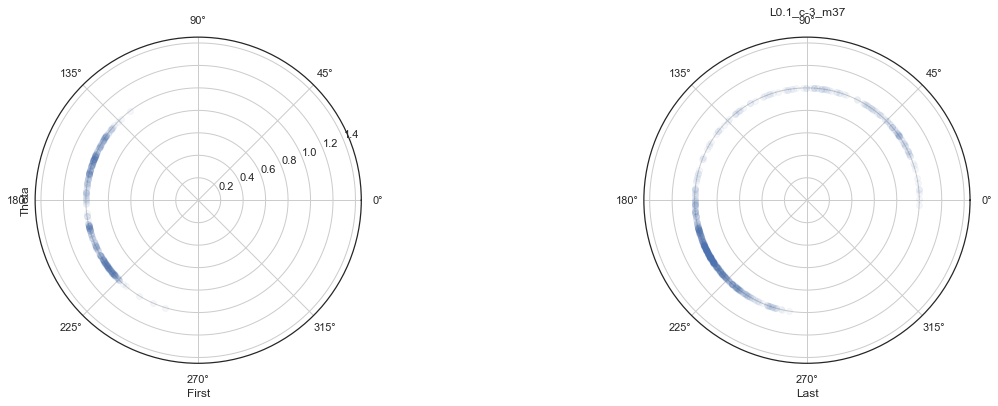

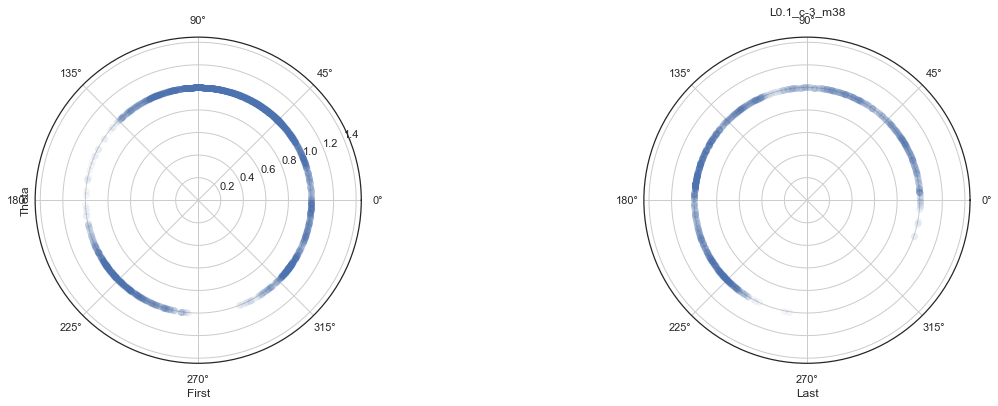

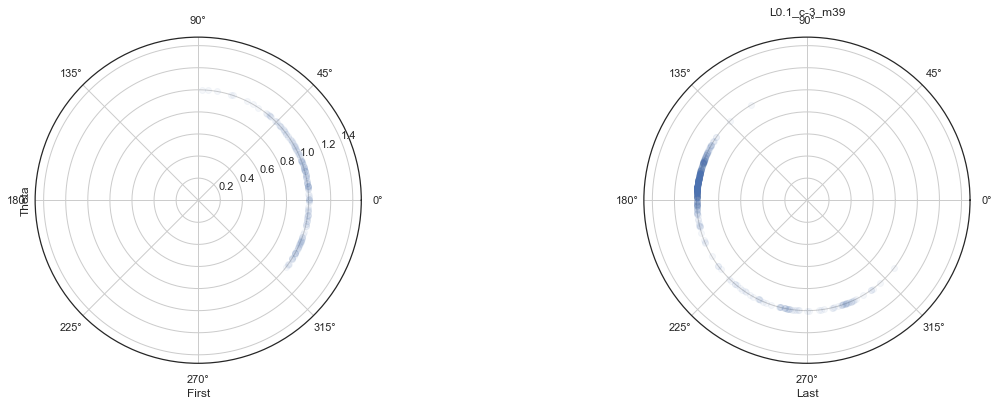

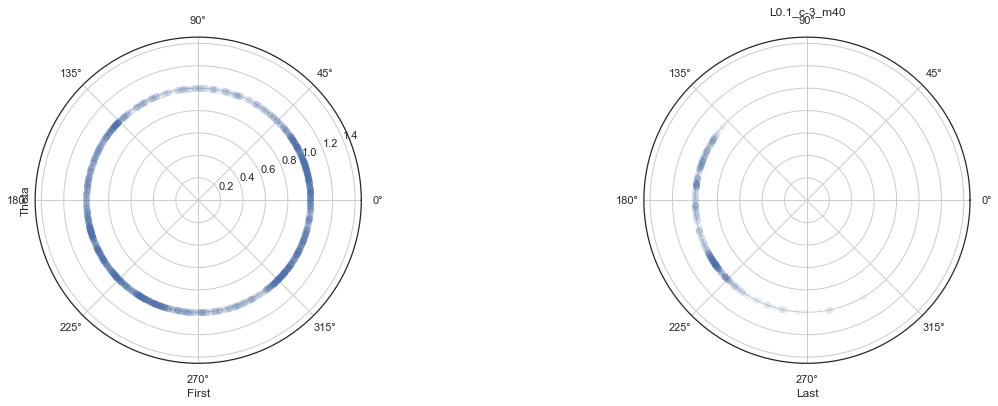

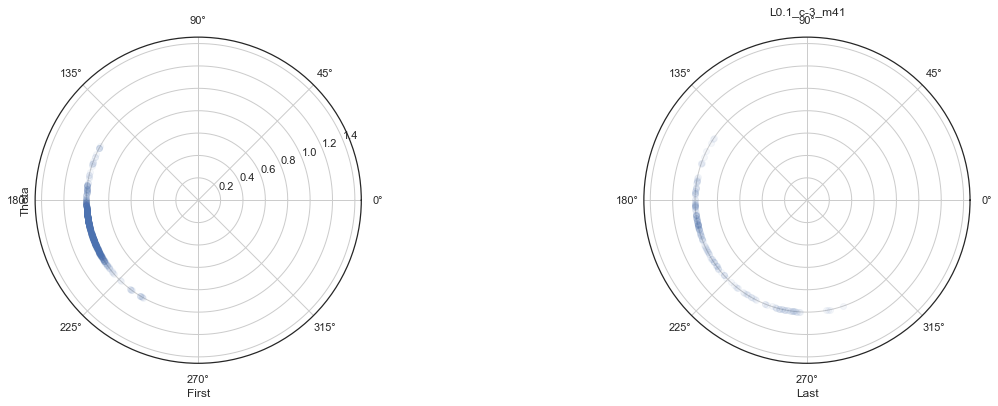

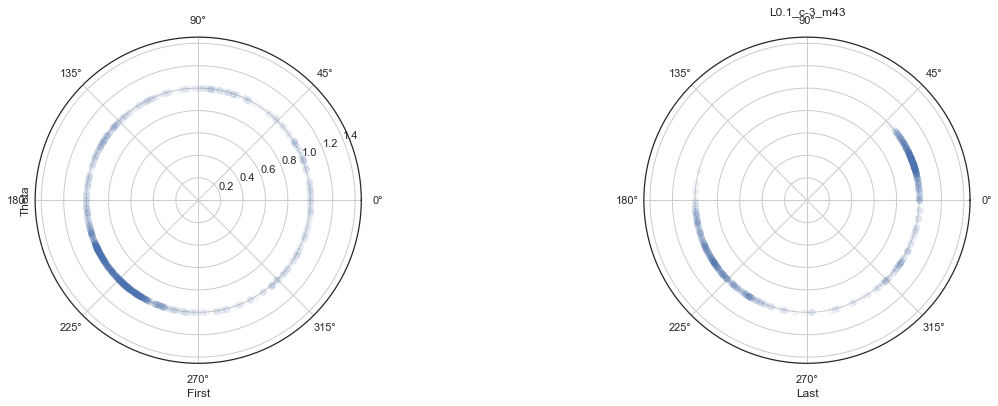

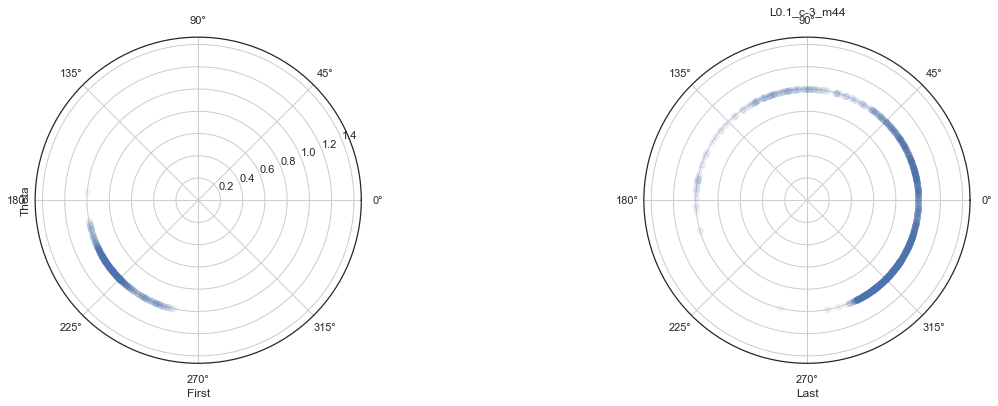

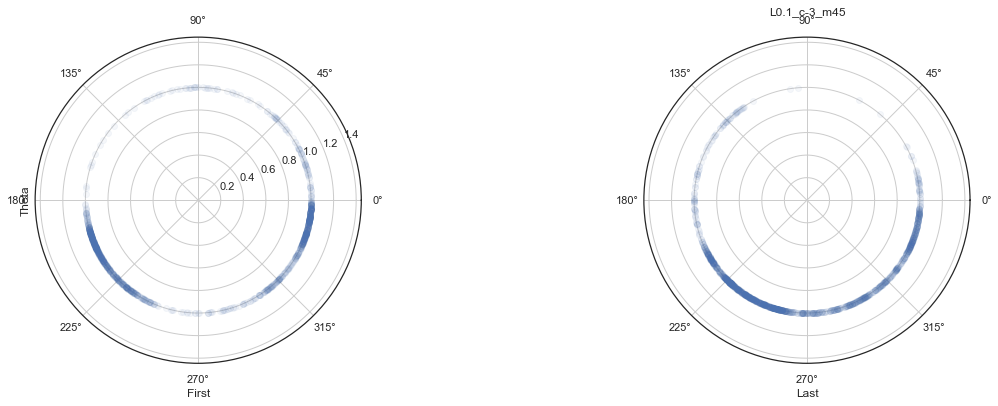

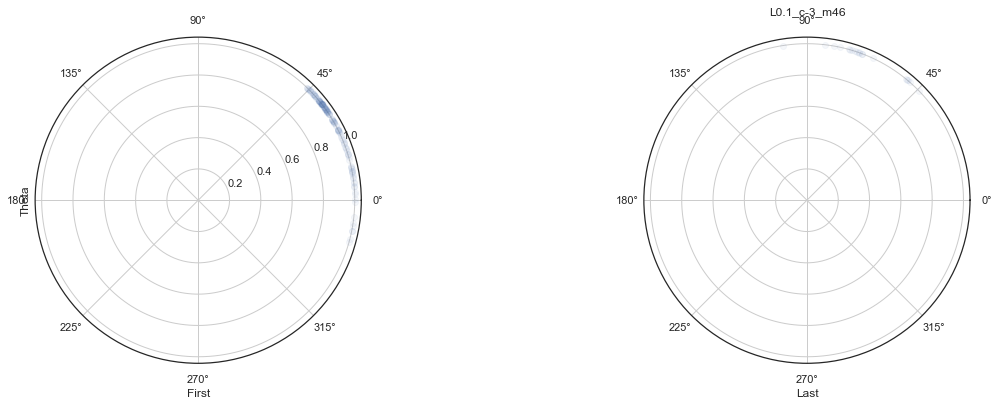

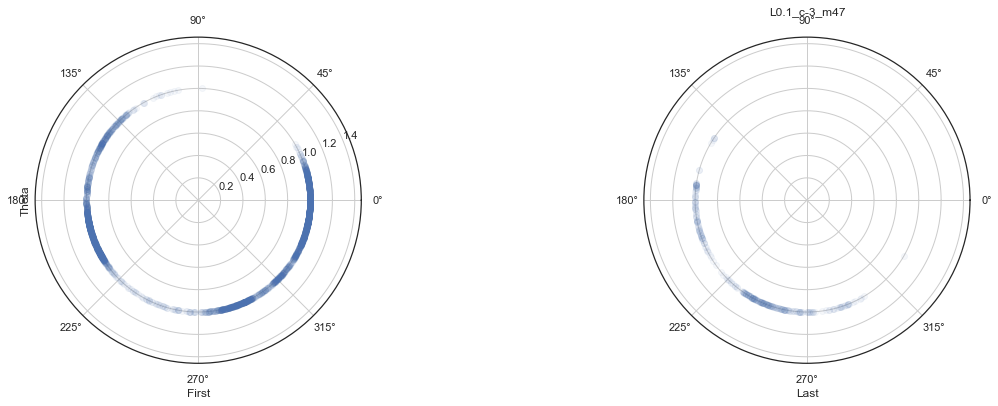

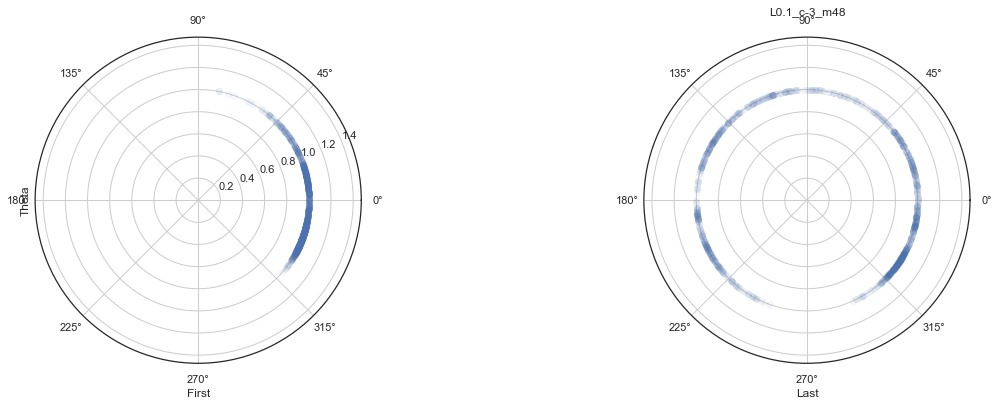

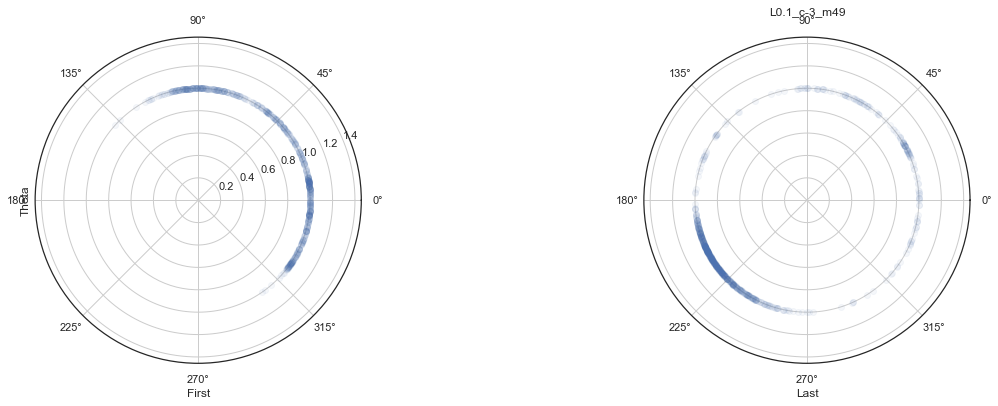

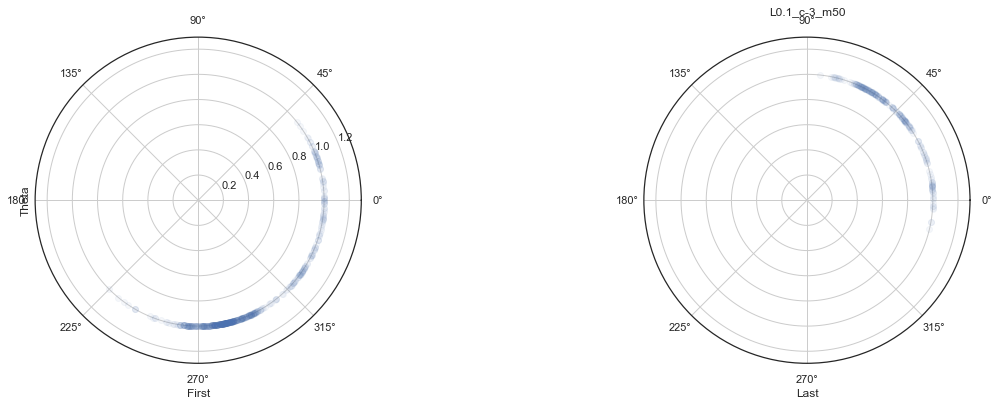

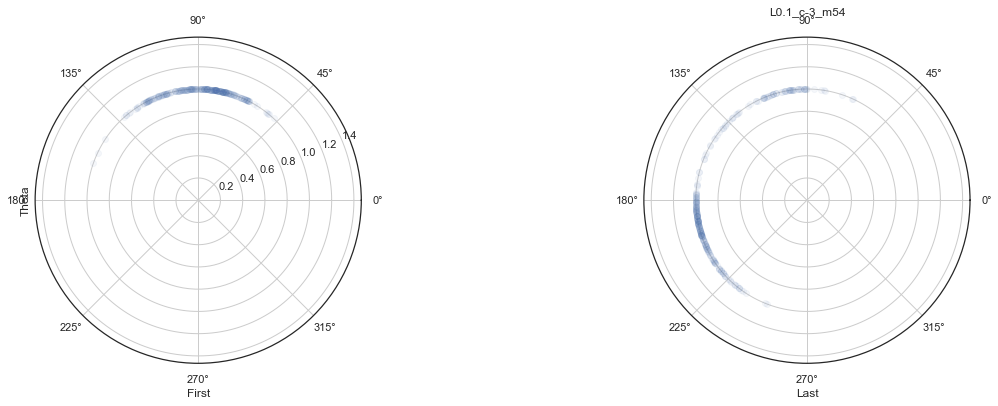

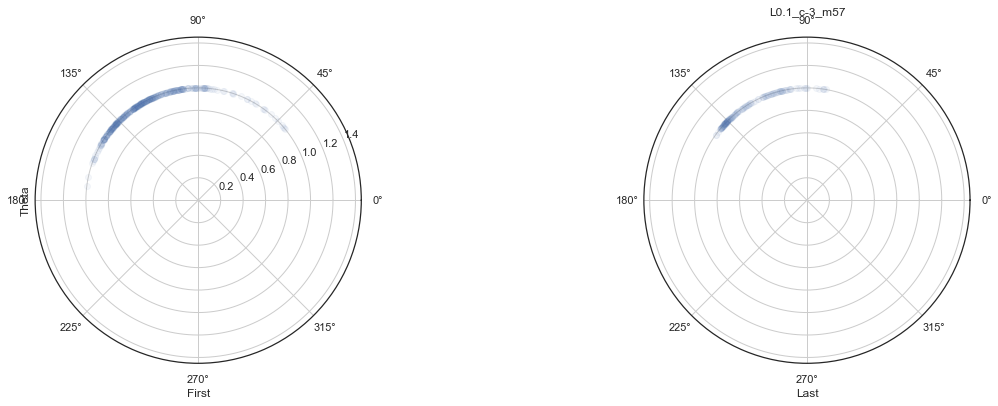

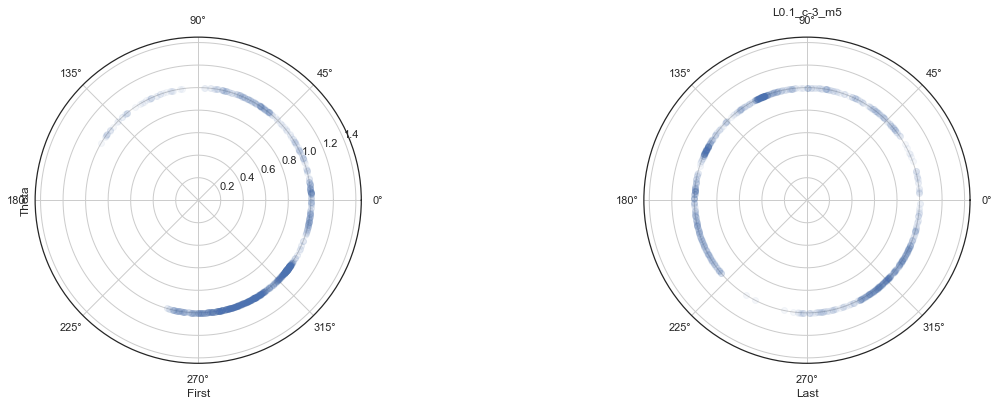

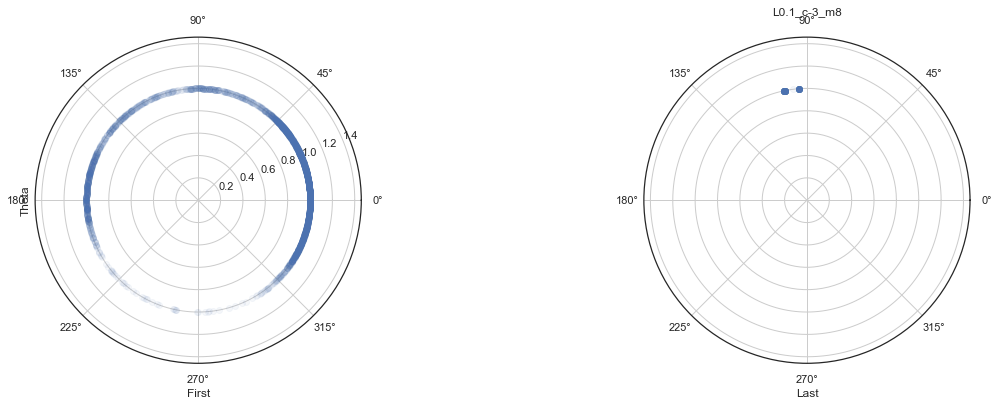

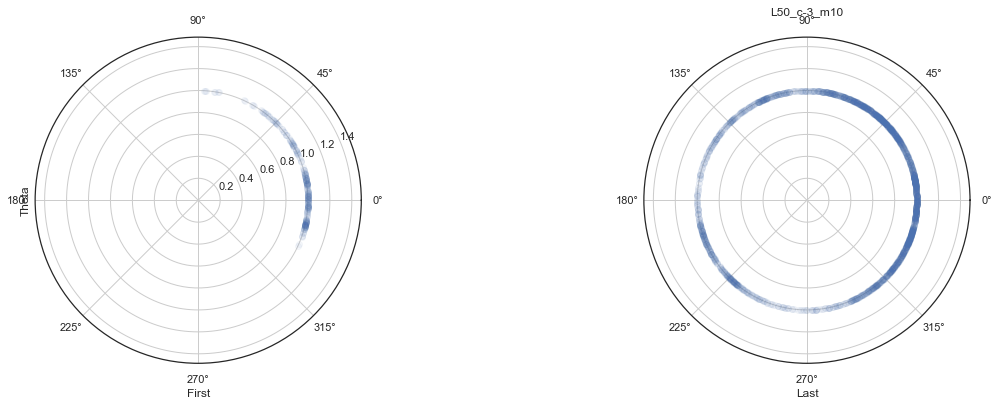

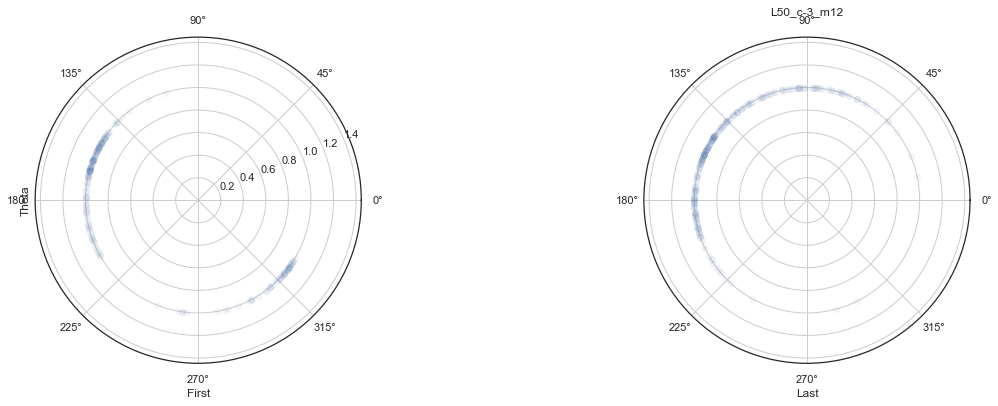

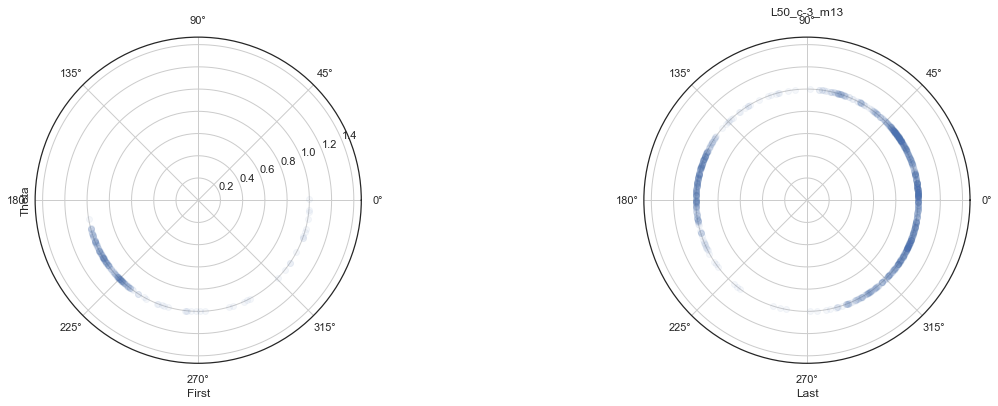

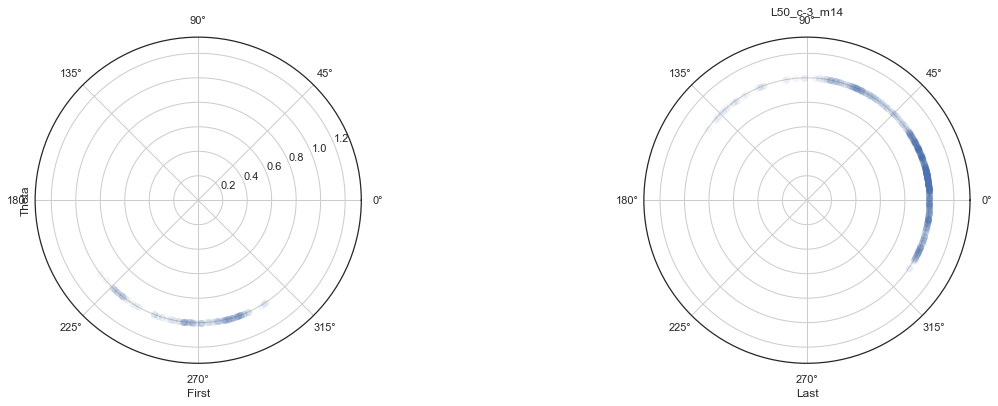

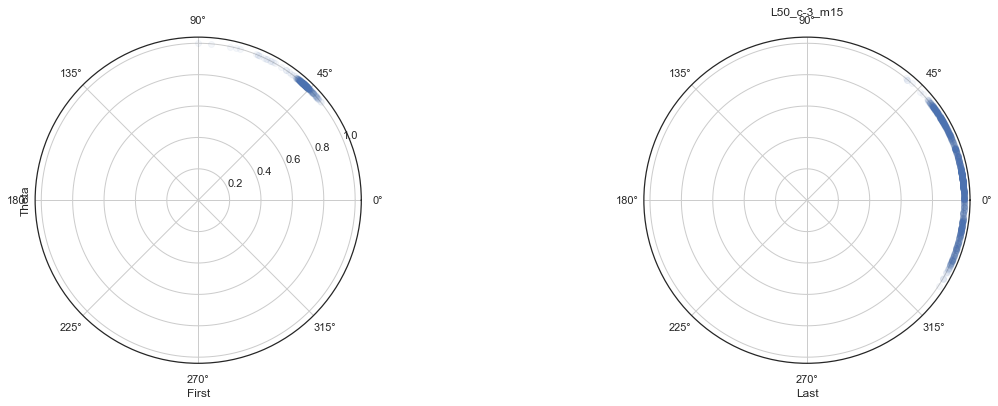

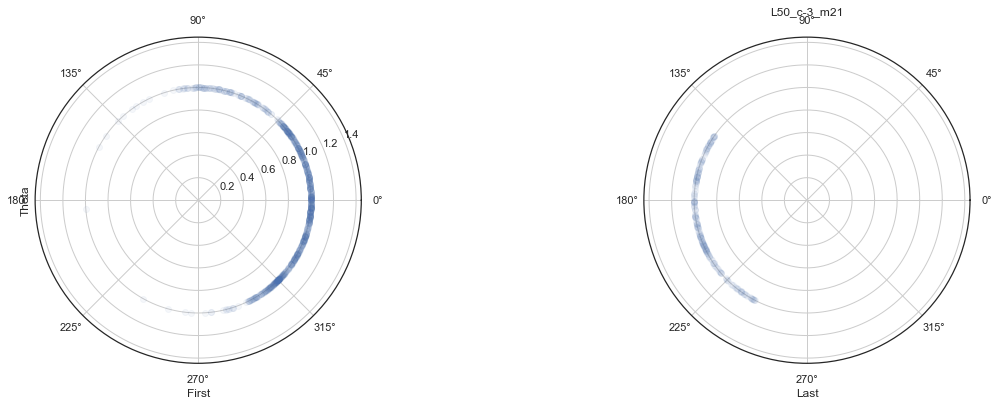

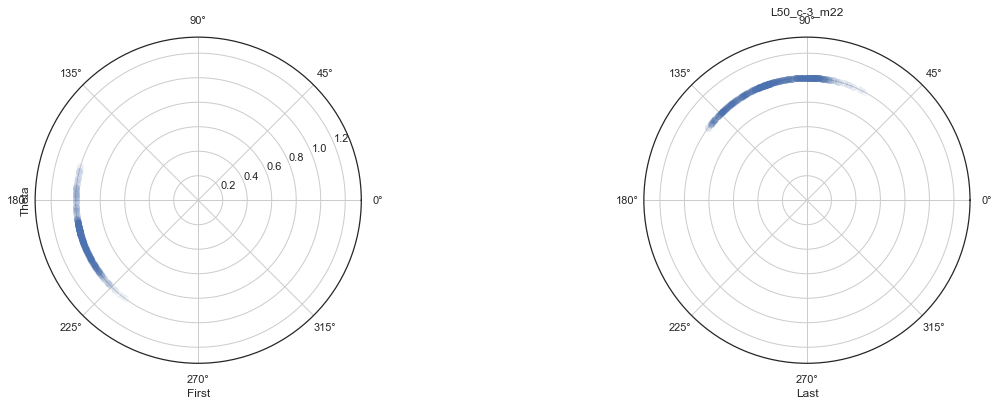

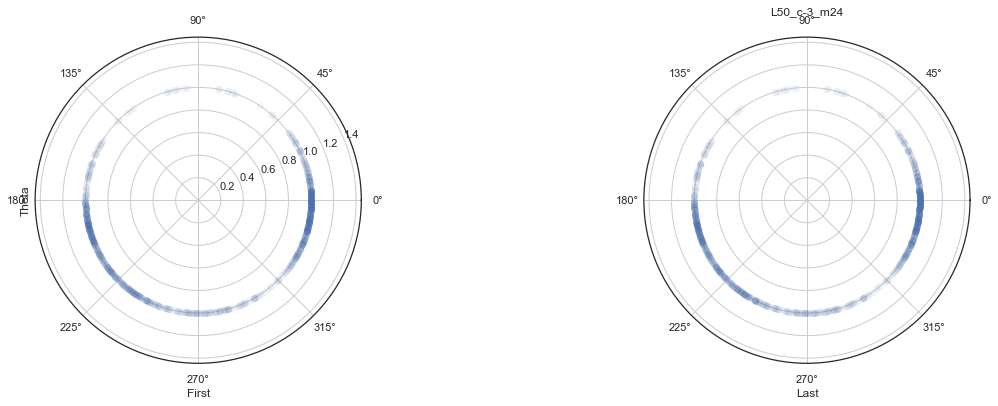

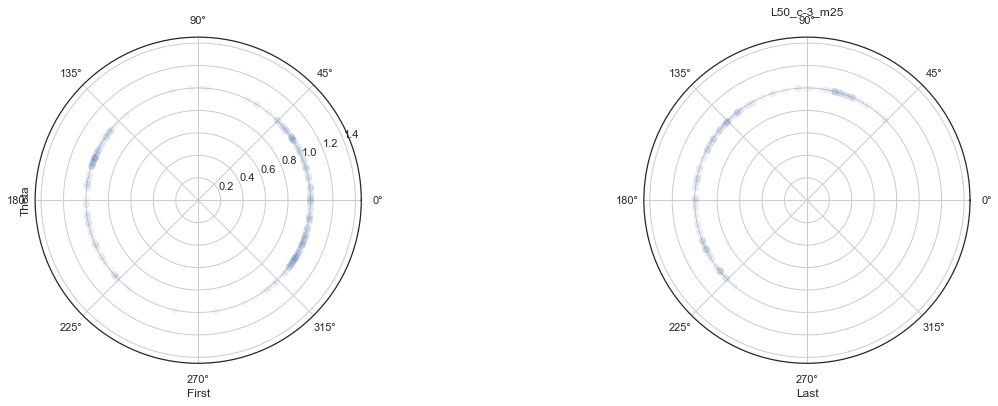

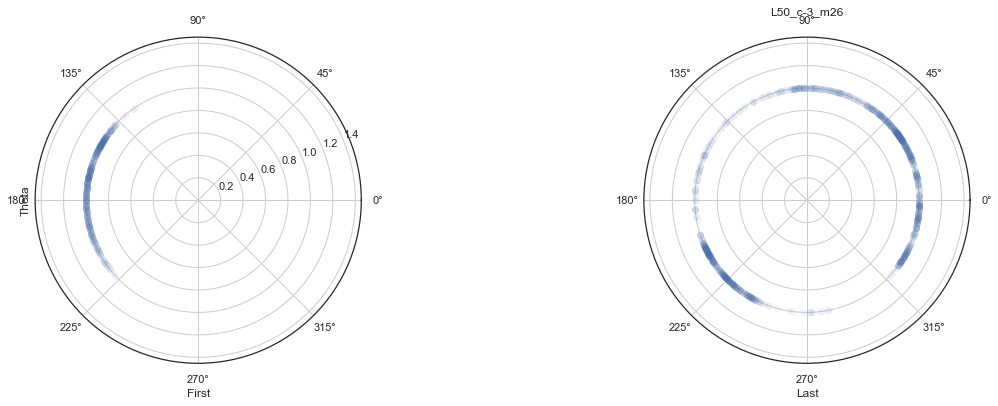

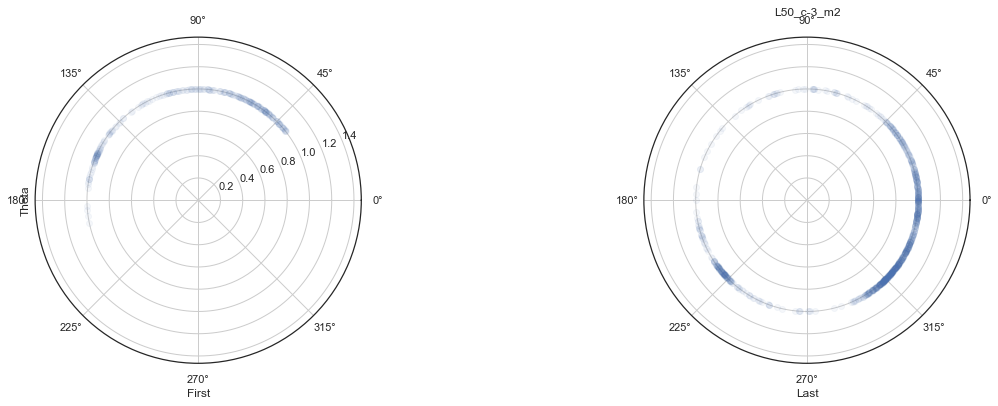

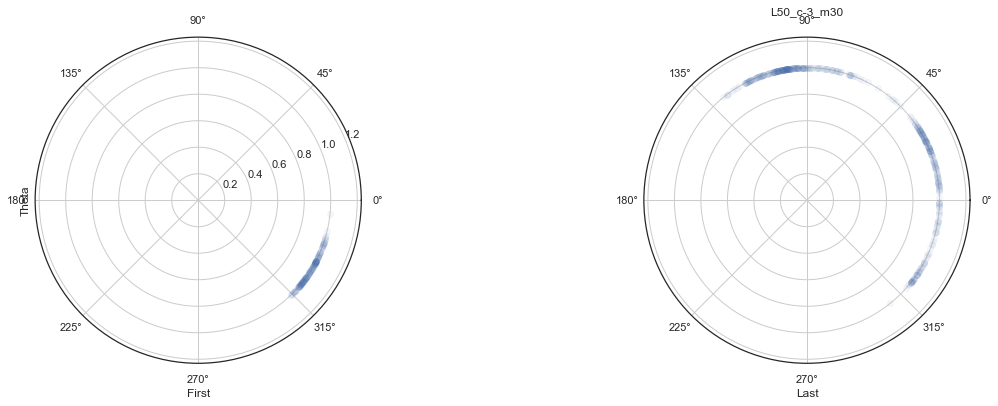

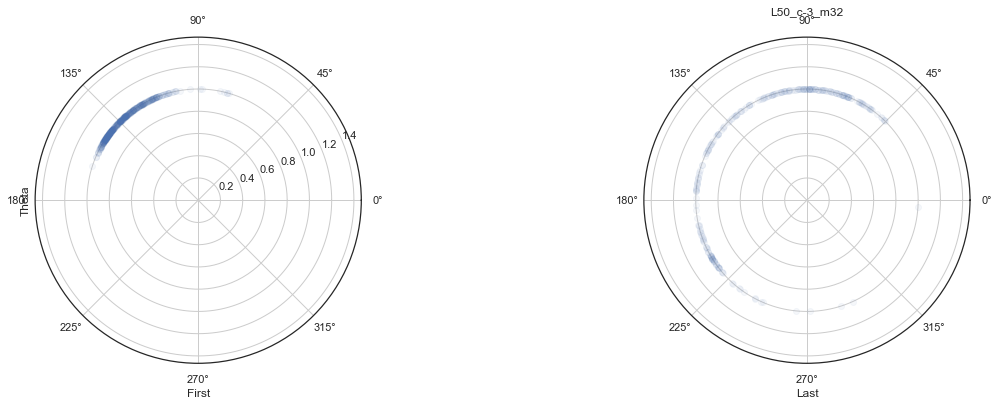

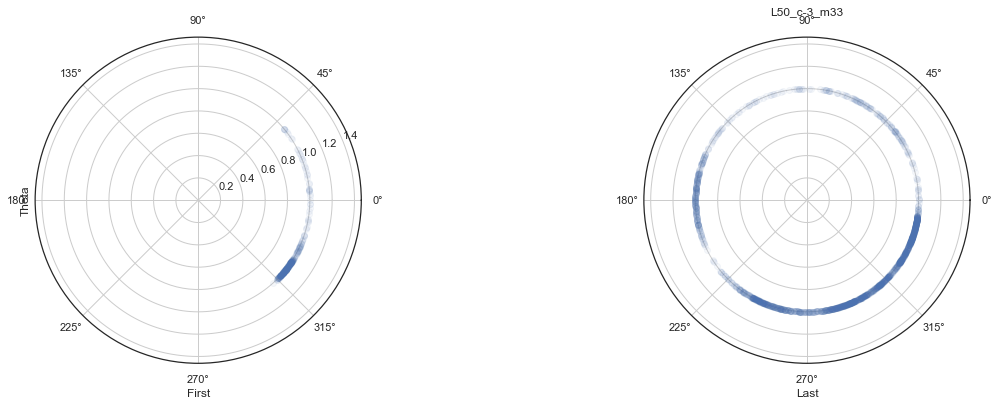

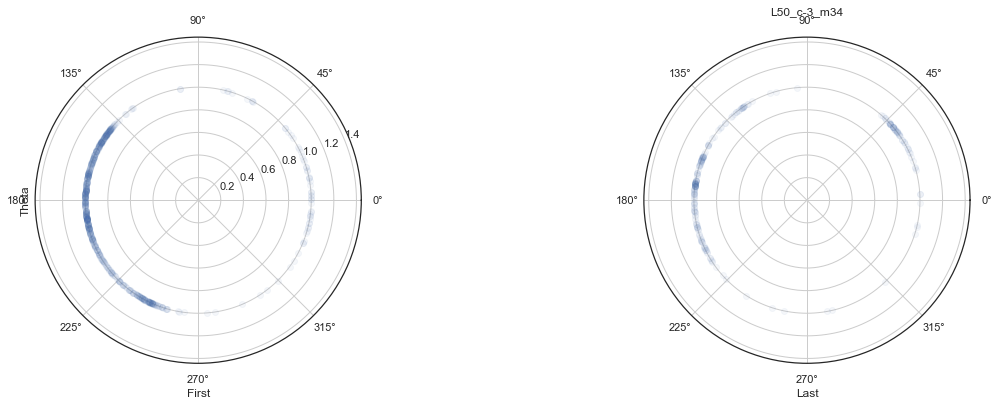

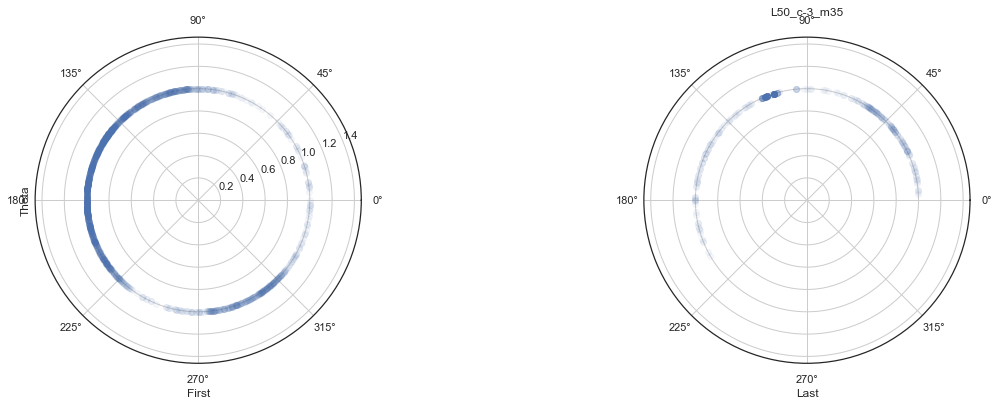

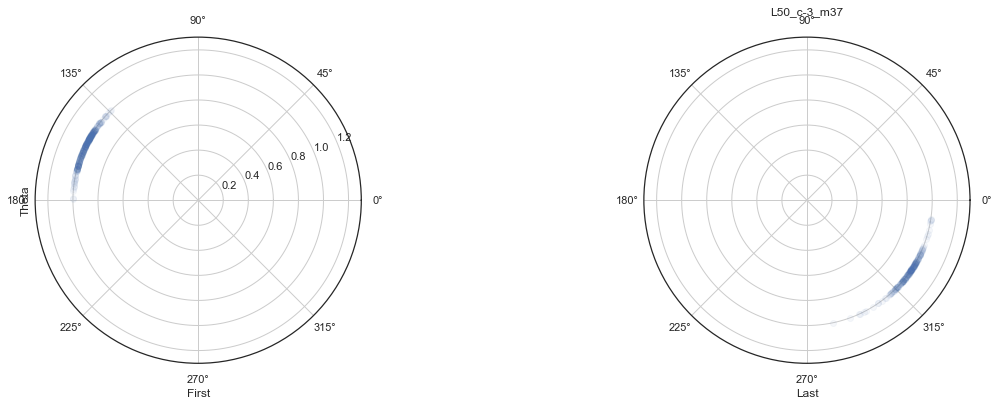

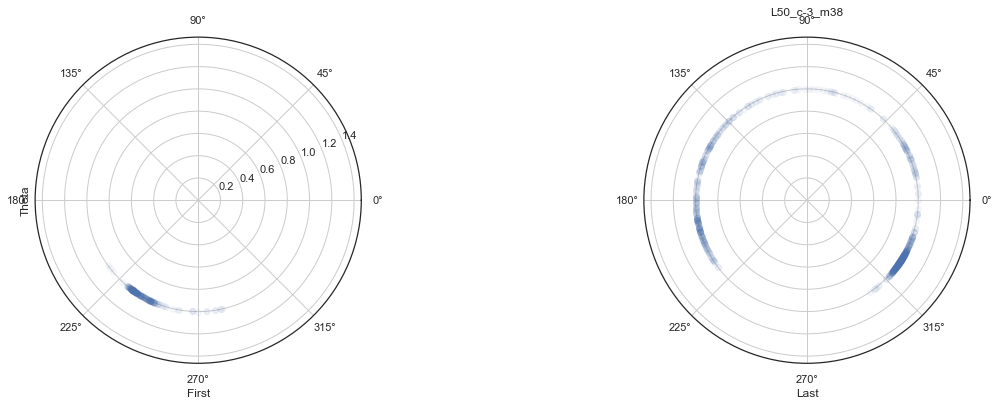

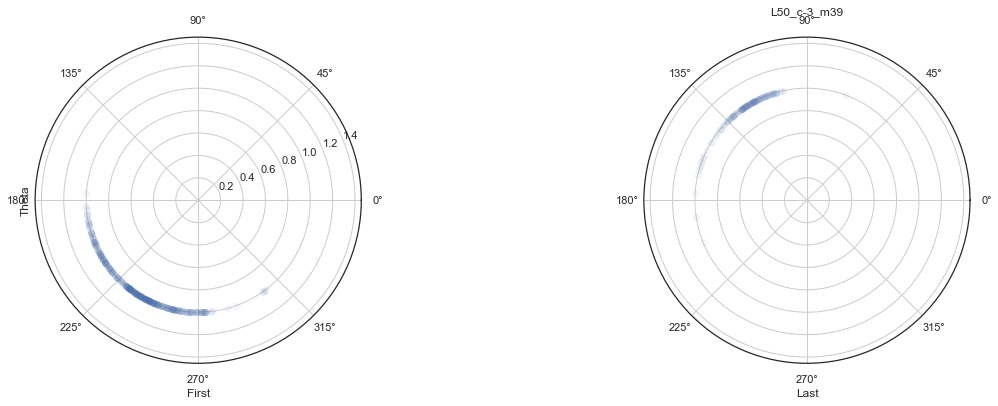

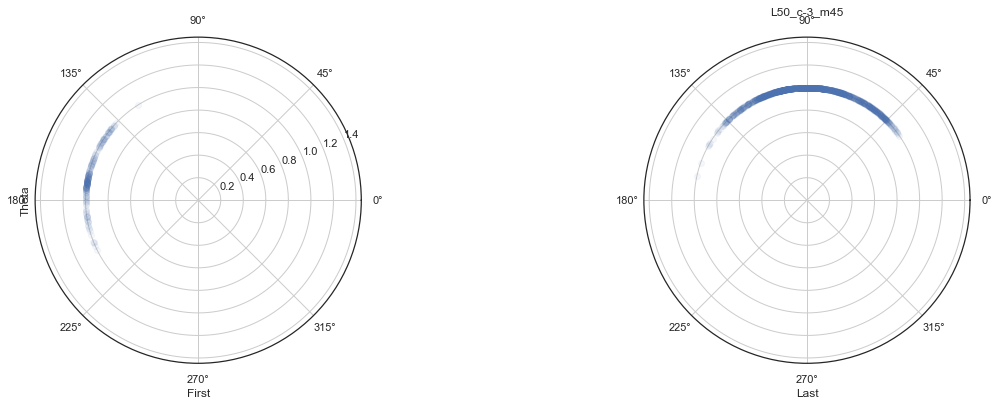

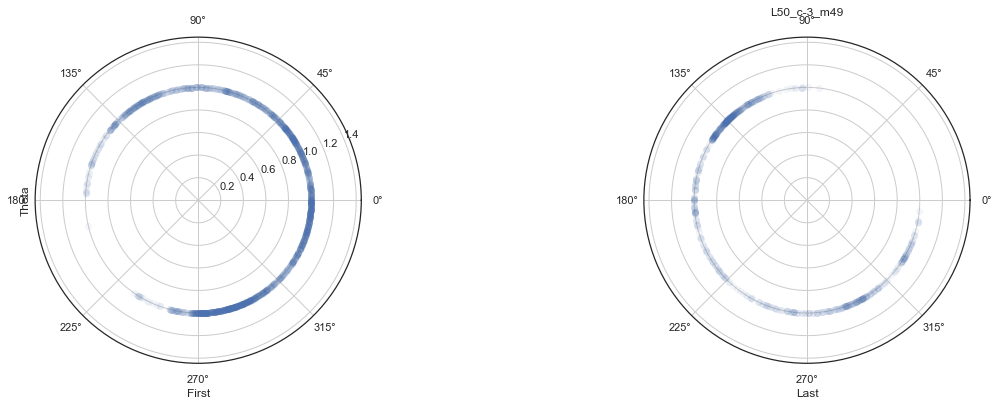

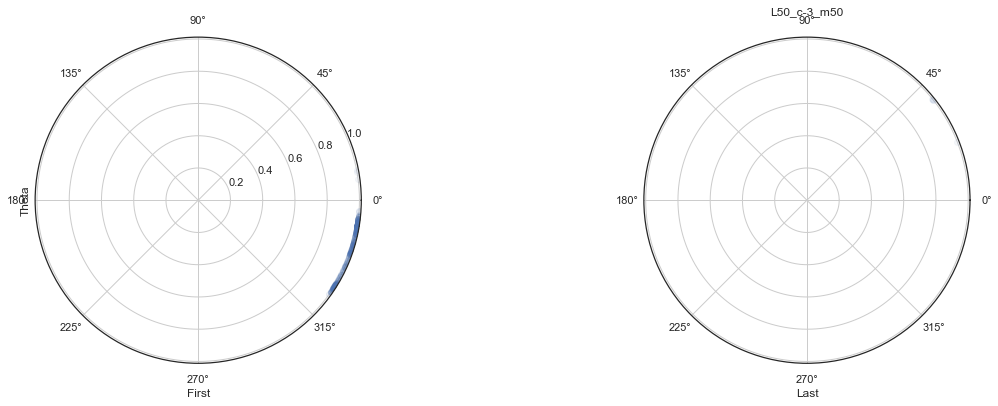

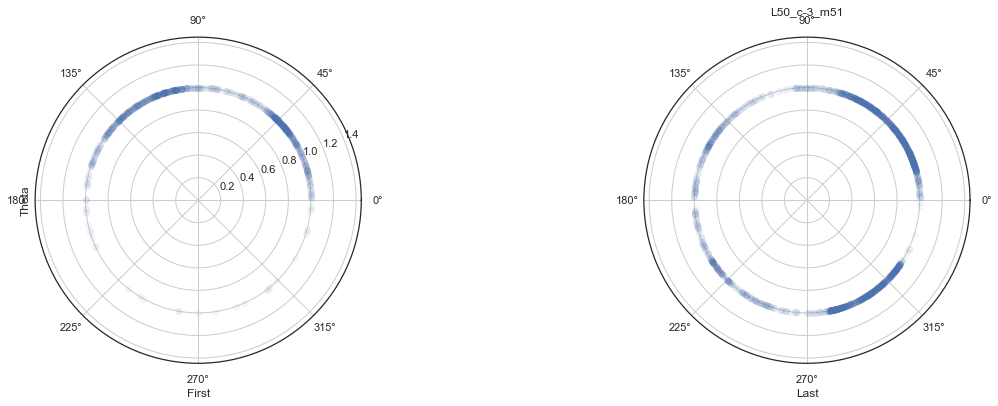

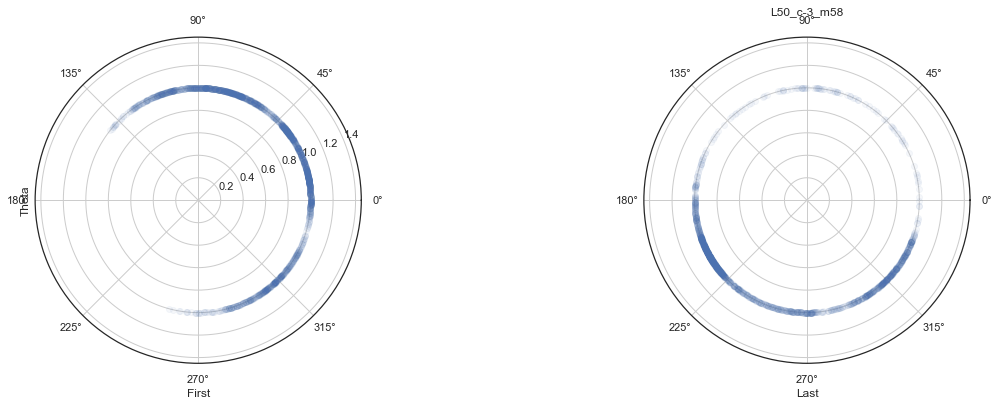

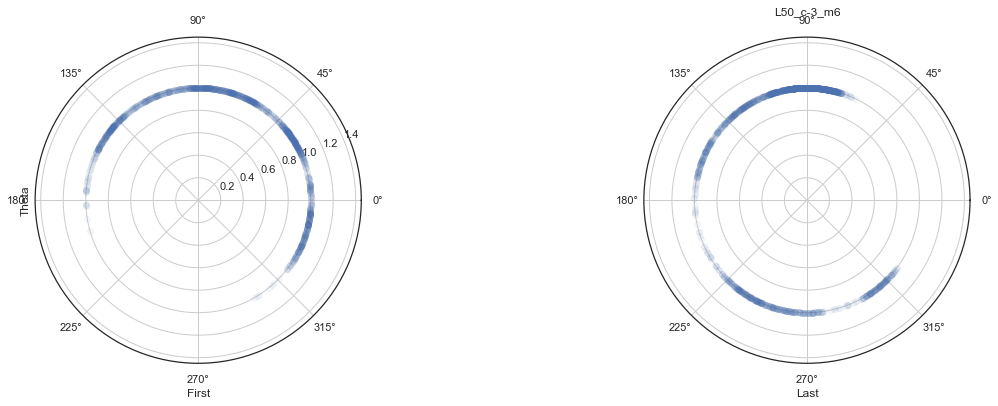

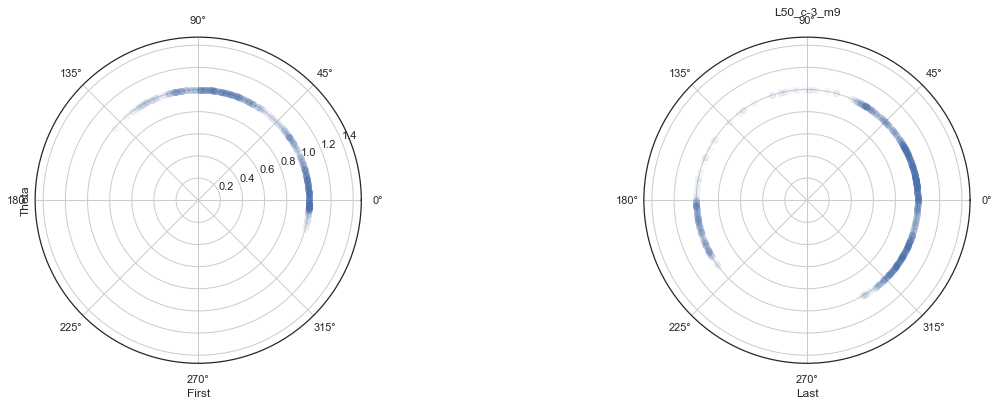

In [158]:
for name in nam_51: 

    theta_pulled_first = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('first'))].theta * np.pi/180
    theta_pulled_last = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('last'))].theta * np.pi/180


    rad_first_visit = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('first'))].radial_distance
    rad_last_visit = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('last'))].radial_distance
    

    if any(list(~np.isnan(rad_first_visit))) == True or any(list(~np.isnan(rad_last_visit))) == True:
        fig, ax = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (20,6), subplot_kw=dict(polar=True))

        radif = np.ones(len(rad_first_visit))
        radil = np.ones(len(rad_last_visit))

        ax[0].scatter(theta_pulled_first,radif, alpha = 0.05)
        ax[0].set_ylabel("Theta")
        ax[0].set_xlabel("First")
        ax[1].scatter(theta_pulled_last,radil, alpha = 0.05)
        ax[1].set_title(name)
        ax[1].set_xlabel("Last")
        plt.savefig(out_path + "\\Theta\\" + name + ".png")
    else:
        print(name)
    


In [159]:
low = np.zeros((50,50))
high = np.zeros((50,50))
for name in nam_51:
    print(name)
    
    if name.startswith('L0.1'):
        temp = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('first'))]
        x = temp.loc[temp.X_position.notnull(), 'X_position']
        y = temp.loc[temp.X_position.notnull(), 'Y_position']



        heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
        heatmap = heatmap/heatmap.max()
        extent = [0, 648, 0, 488]


       
        
       

        low = low + heatmap 
    elif name.startswith('L50'):
        temp = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('first'))]
        x = temp.loc[temp.X_position.notnull(), 'X_position']
        y = temp.loc[temp.X_position.notnull(), 'Y_position']



        heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
        heatmap = heatmap/heatmap.max()
        extent = [0, 648, 488, 0]


        

        high = high + heatmap 


L0.1_c-3_m10
L0.1_c-3_m12
L0.1_c-3_m20
L0.1_c-3_m21
L0.1_c-3_m22
L0.1_c-3_m23
L0.1_c-3_m24
L0.1_c-3_m25
L0.1_c-3_m27
L0.1_c-3_m2
L0.1_c-3_m32
L0.1_c-3_m34
L0.1_c-3_m37
L0.1_c-3_m38
L0.1_c-3_m39
L0.1_c-3_m40
L0.1_c-3_m41
L0.1_c-3_m43
L0.1_c-3_m44
L0.1_c-3_m45
L0.1_c-3_m46
L0.1_c-3_m47
L0.1_c-3_m48
L0.1_c-3_m49
L0.1_c-3_m50
L0.1_c-3_m54
L0.1_c-3_m57
L0.1_c-3_m5
L0.1_c-3_m8
L50_c-3_m10
L50_c-3_m12
L50_c-3_m13
L50_c-3_m14
L50_c-3_m15
L50_c-3_m21
L50_c-3_m22
L50_c-3_m24
L50_c-3_m25
L50_c-3_m26
L50_c-3_m2
L50_c-3_m30
L50_c-3_m32
L50_c-3_m33
L50_c-3_m34
L50_c-3_m35
L50_c-3_m37
L50_c-3_m38
L50_c-3_m39
L50_c-3_m45
L50_c-3_m49
L50_c-3_m50
L50_c-3_m51
L50_c-3_m58
L50_c-3_m6
L50_c-3_m9


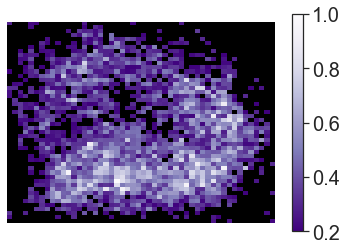

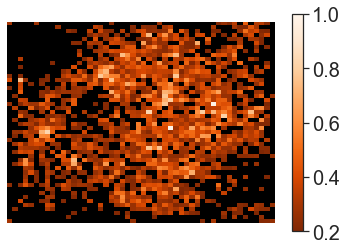

In [160]:
low = low/low.max()
high = high/high.max()
plt.clf()
plt.grid(False)
plt.tick_params(labelsize = 20)
cmap = plt.cm.Purples_r
cmap.set_under(color='black')
im = plt.imshow(low, extent=extent, origin='upper', cmap = cmap, vmin = 0.2 )
clr = plt.colorbar(im)
clr.ax.tick_params(labelsize=20)
plt.axis('off')
plt.savefig(out_path + "\\HeatMaps\\Low_FirstTrial_HeatMap.png")
plt.show()
plt.clf()
plt.grid(False)
plt.tick_params(labelsize = 20)
cmap = plt.cm.Oranges_r
cmap.set_under(color='black')
im = plt.imshow(high, extent=extent, origin='upper', cmap = cmap, vmin = 0.2)
clr = plt.colorbar(im)
clr.ax.tick_params(labelsize=20)
plt.axis('off')
plt.savefig(out_path + "\\HeatMaps\\High_FirstTrial_HeatMap.png")
plt.show()

L0.1_c-3_m10
L0.1_c-3_m12
L0.1_c-3_m20
L0.1_c-3_m21
L0.1_c-3_m22
L0.1_c-3_m23
L0.1_c-3_m24
L0.1_c-3_m25
L0.1_c-3_m27
L0.1_c-3_m2
L0.1_c-3_m32
L0.1_c-3_m34
L0.1_c-3_m37
L0.1_c-3_m38
L0.1_c-3_m39
L0.1_c-3_m40
L0.1_c-3_m41
L0.1_c-3_m43
L0.1_c-3_m44
L0.1_c-3_m45
L0.1_c-3_m46
L0.1_c-3_m47
L0.1_c-3_m48
L0.1_c-3_m49
L0.1_c-3_m50
L0.1_c-3_m54
L0.1_c-3_m57
L0.1_c-3_m5
L0.1_c-3_m8
L50_c-3_m10
L50_c-3_m12
L50_c-3_m13
L50_c-3_m14
L50_c-3_m15
L50_c-3_m21
L50_c-3_m22
L50_c-3_m24
L50_c-3_m25
L50_c-3_m26
L50_c-3_m2
L50_c-3_m30
L50_c-3_m32
L50_c-3_m33
L50_c-3_m34
L50_c-3_m35
L50_c-3_m37
L50_c-3_m38
L50_c-3_m39
L50_c-3_m45
L50_c-3_m49
L50_c-3_m50
L50_c-3_m51
L50_c-3_m58
L50_c-3_m6
L50_c-3_m9


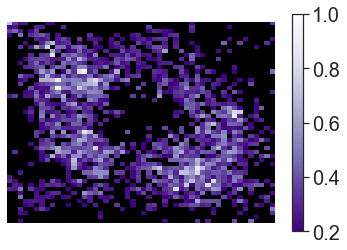

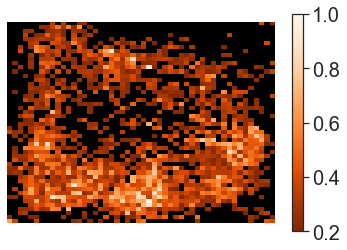

In [161]:
low = np.zeros((50,50))
high = np.zeros((50,50))
for name in nam_51:
    print(name)
    
    if name.startswith('L0.1'):
        temp = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('last'))]
        x = temp.loc[temp.X_position.notnull(), 'X_position']
        y = temp.loc[temp.X_position.notnull(), 'Y_position']



        heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
        heatmap = heatmap/heatmap.max()
        extent = [0, 648, 488, 0]


        

        low = low + heatmap 
    elif name.startswith('L50'):
        temp = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('last'))]
        x = temp.loc[temp.X_position.notnull(), 'X_position']
        y = temp.loc[temp.X_position.notnull(), 'Y_position']



        heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
        heatmap = heatmap/heatmap.max()
        extent = [0, 648, 488, 0]


        

        high = high + heatmap 
        
low = low/low.max()
high = high/high.max()
plt.clf()
plt.grid(False)
plt.tick_params(labelsize = 20)
cmap = plt.cm.Purples_r
cmap.set_under(color='black')
im = plt.imshow(low, extent=extent, origin='upper', cmap = cmap, vmin = 0.2 )
clr = plt.colorbar(im)
clr.ax.tick_params(labelsize=20)
plt.axis('off')
plt.savefig(out_path + "\\HeatMaps\\Low_LastTrial_HeatMap.png")
plt.show()
plt.clf()
plt.grid(False)
plt.tick_params(labelsize = 20)
cmap = plt.cm.Oranges_r
cmap.set_under(color='black')
im = plt.imshow(high, extent=extent, origin='upper', cmap = cmap, vmin = 0.2)
clr = plt.colorbar(im)
clr.ax.tick_params(labelsize=20)
plt.axis('off')
plt.savefig(out_path+ "\\HeatMaps\\High_LastTrial_HeatMap.png")
plt.show()